In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize']= (40, 9)

In [2]:
sred=pd.read_csv("C:\Ajinkya\Studies\ADS\sred.csv", sep=',')
sred.head()

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
0,AK,West,20101,224952,160599,64352,28.6,1.481,1.552
1,AK,West,20102,225511,160252,65259,28.9,1.484,1.576
2,AK,West,20093,225820,163791,62029,27.5,1.486,1.494
3,AK,West,20094,224994,161787,63207,28.1,1.481,1.524
4,AK,West,20074,234590,155400,79190,33.8,1.544,1.885


In [3]:
sred.describe() #A table describing the minimum and maximum values of all the columns. The home value is positive and lies between a valid range. Same applies with the Structure cost, Land value and other columns too.

,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
count,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000
mean,19938.764706,135312.625016,99533.642061,35778.981161,18.167423,0.869457,0.991153
std,110.418887,105830.497603,56127.111413,68794.089314,16.991429,0.499570,1.815789
min,19751.000000,18763.000000,17825.000000,938.000000,5.000000,0.135000,0.000000
25%,19843.000000,62235.000000,53776.500000,4178.000000,5.000000,0.455000,0.002000
50%,19941.000000,108724.000000,88352.000000,9478.000000,10.400000,0.783000,0.252000
75%,20033.000000,172030.500000,134871.000000,38631.000000,26.300000,1.207500,1.151000
max,20131.000000,862885.000000,325595.000000,594417.000000,81.700000,2.893000,15.434000


In [4]:
sred.apply(lambda x: sum(x.isnull()),axis=0) #153 null values in region which indicates there is no proper input for region value. This indicated the region is unknown and hence we cannot predict the correct region.

State                 0
region              153
Date                  0
Home.Value            0
Structure.Cost        0
Land.Value            0
Land.Share..Pct.      0
Home.Price.Index      0
Land.Price.Index      0
dtype: int64

In [5]:
sred.isnull().sum()

State                 0
region              153
Date                  0
Home.Value            0
Structure.Cost        0
Land.Value            0
Land.Share..Pct.      0
Home.Price.Index      0
Land.Price.Index      0
dtype: int64

In [6]:
sred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7803 entries, 0 to 7802
Data columns (total 9 columns):
State               7803 non-null object
region              7650 non-null object
Date                7803 non-null int64
Home.Value          7803 non-null int64
Structure.Cost      7803 non-null int64
Land.Value          7803 non-null int64
Land.Share..Pct.    7803 non-null float64
Home.Price.Index    7803 non-null float64
Land.Price.Index    7803 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 548.7+ KB


In [7]:
sred_bak=sred.copy() #Creating a duplicate copy of the dataset to carry out further operations.

In [8]:
sred_bak.dropna(inplace=True) #Drop null values of region from the duplicate copy of dataset.

In [9]:
sred_bak.isnull().sum() #No null values in the duplicate copy of dataset

State               0
region              0
Date                0
Home.Value          0
Structure.Cost      0
Land.Value          0
Land.Share..Pct.    0
Home.Price.Index    0
Land.Price.Index    0
dtype: int64

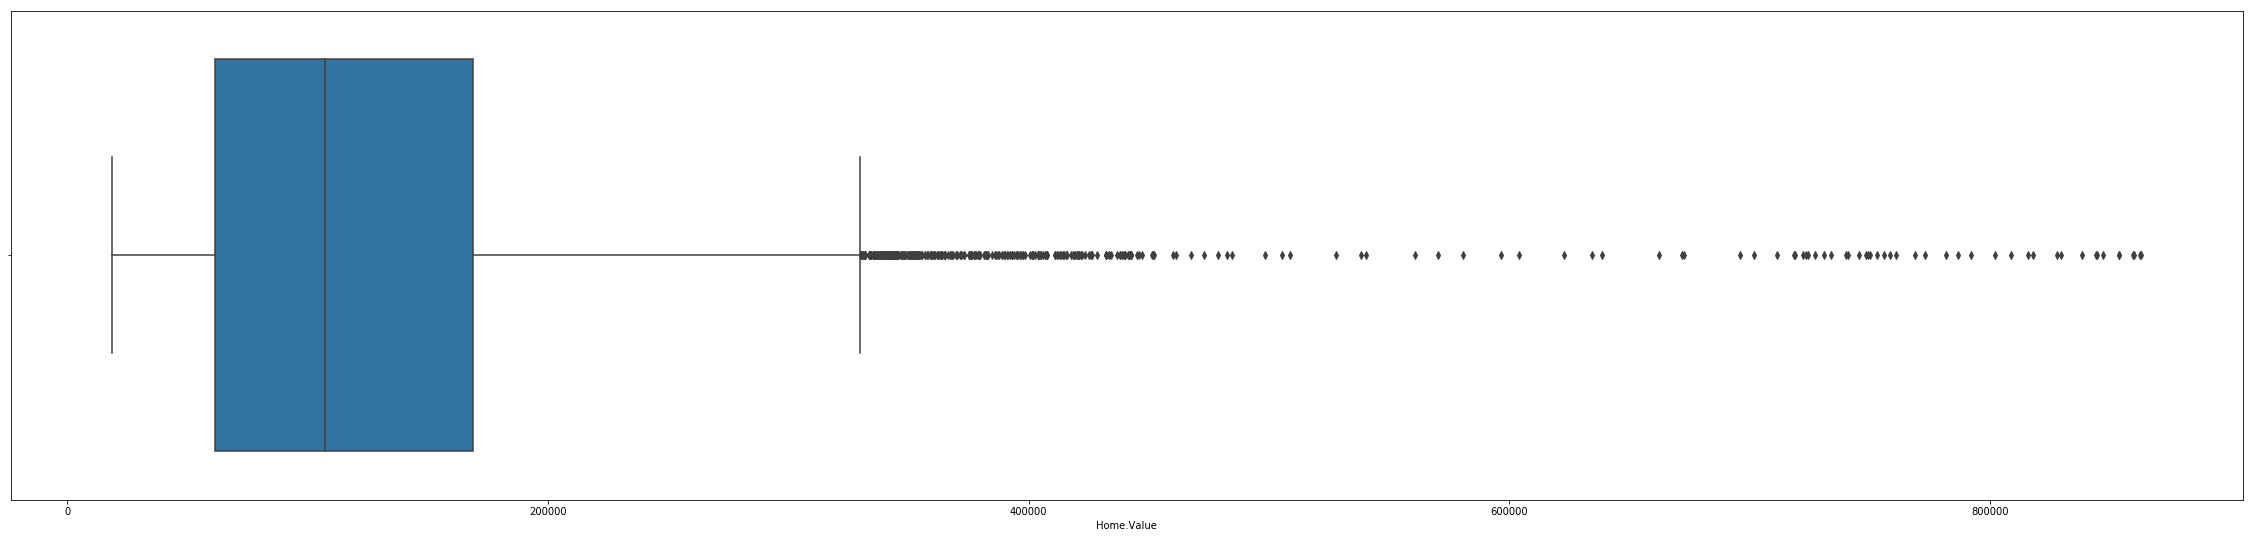

In [10]:
sns.boxplot(x=sred_bak['Home.Value']) #Outliers- a data point on a graph or in a set of results that is very much bigger or smaller than the next nearest data point
#Values almost above 300000 are outliers. i.e they are away from mean

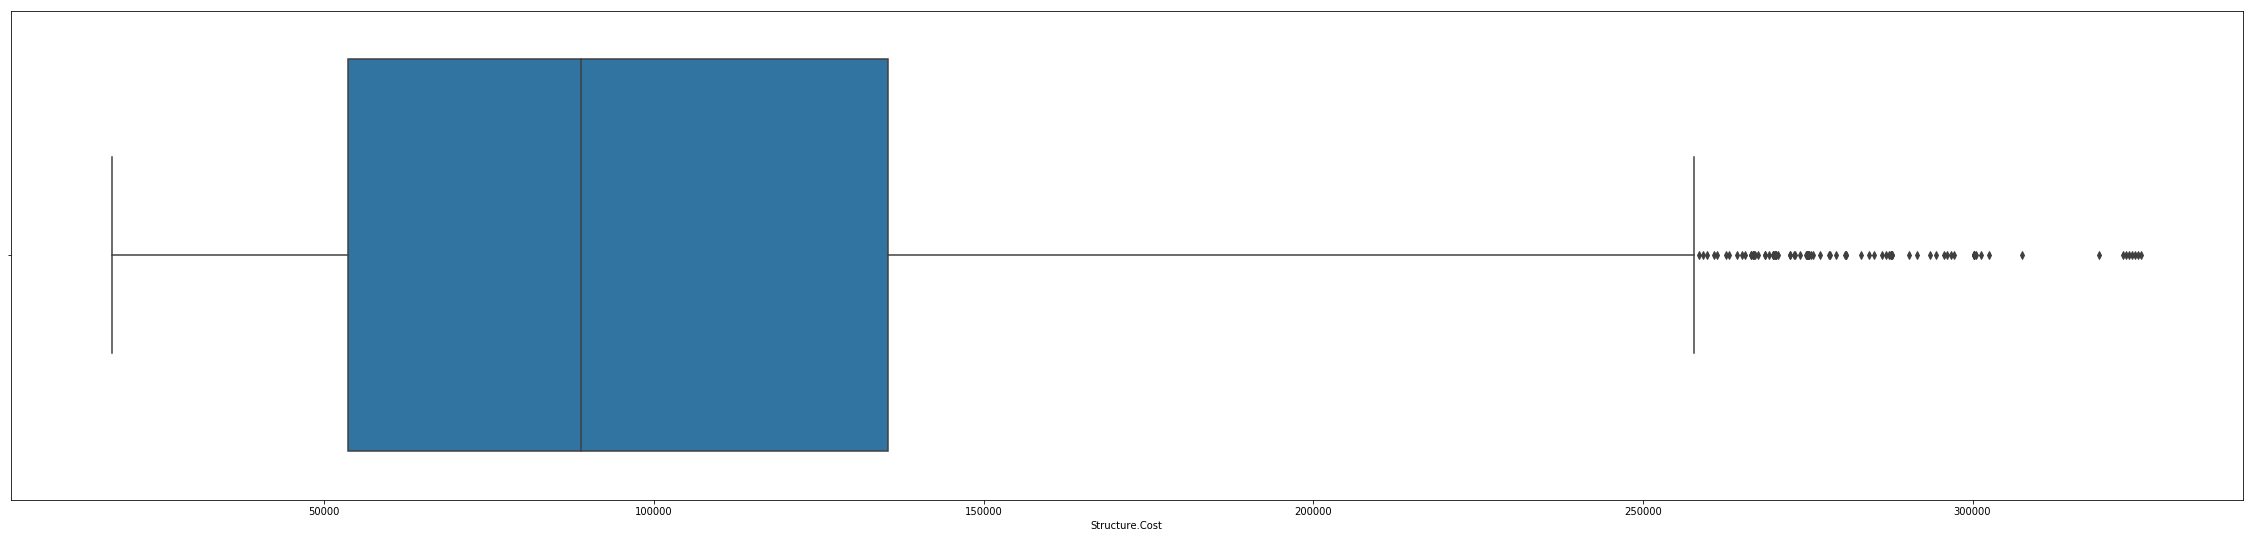

In [11]:
sns.boxplot(x=sred_bak['Structure.Cost']) #Values above 270000 are outliers.

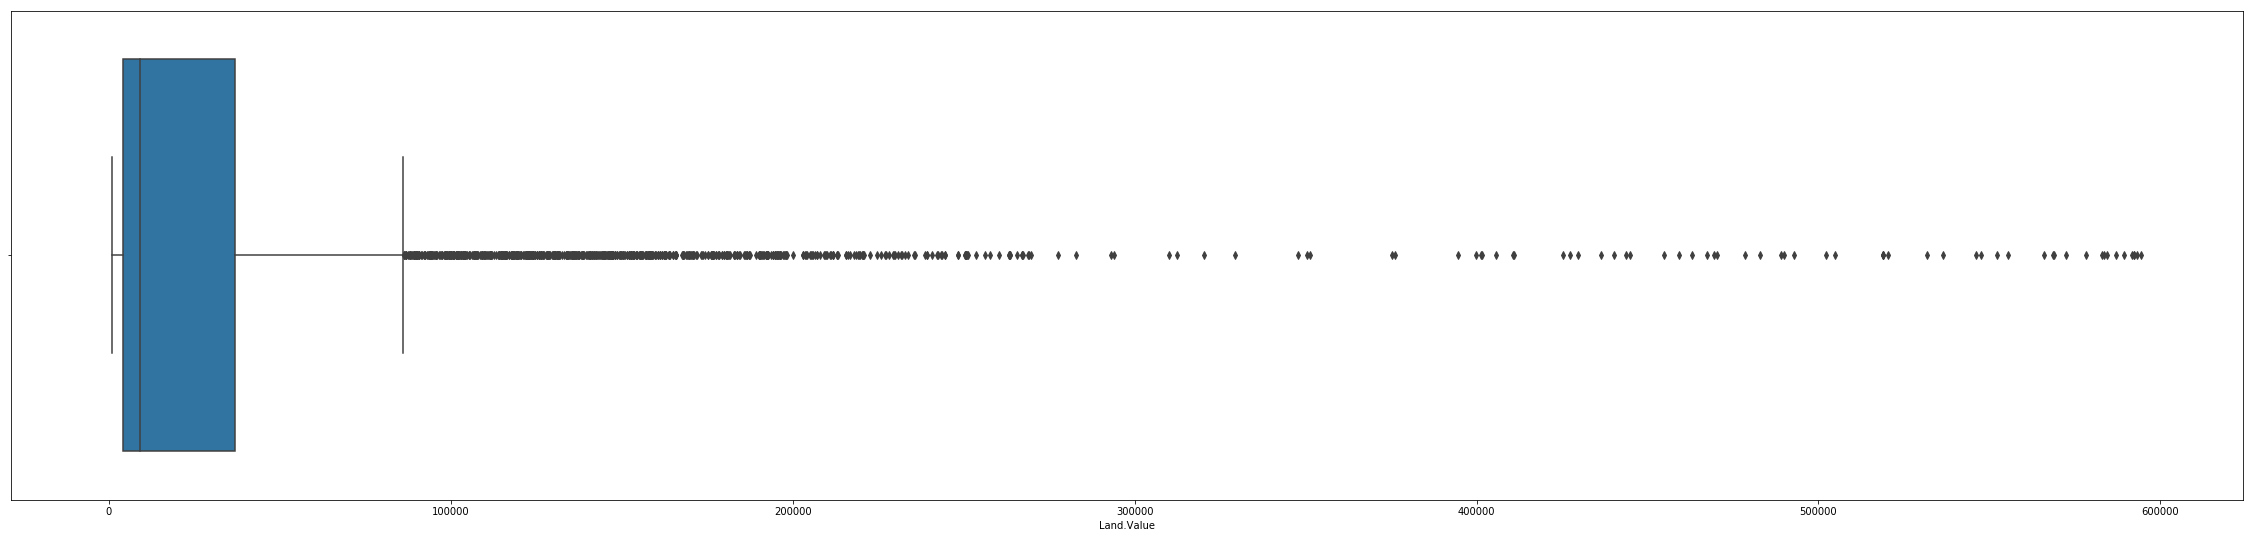

In [12]:
sns.boxplot(x=sred_bak['Land.Value']) #Values above 80000 are outliers

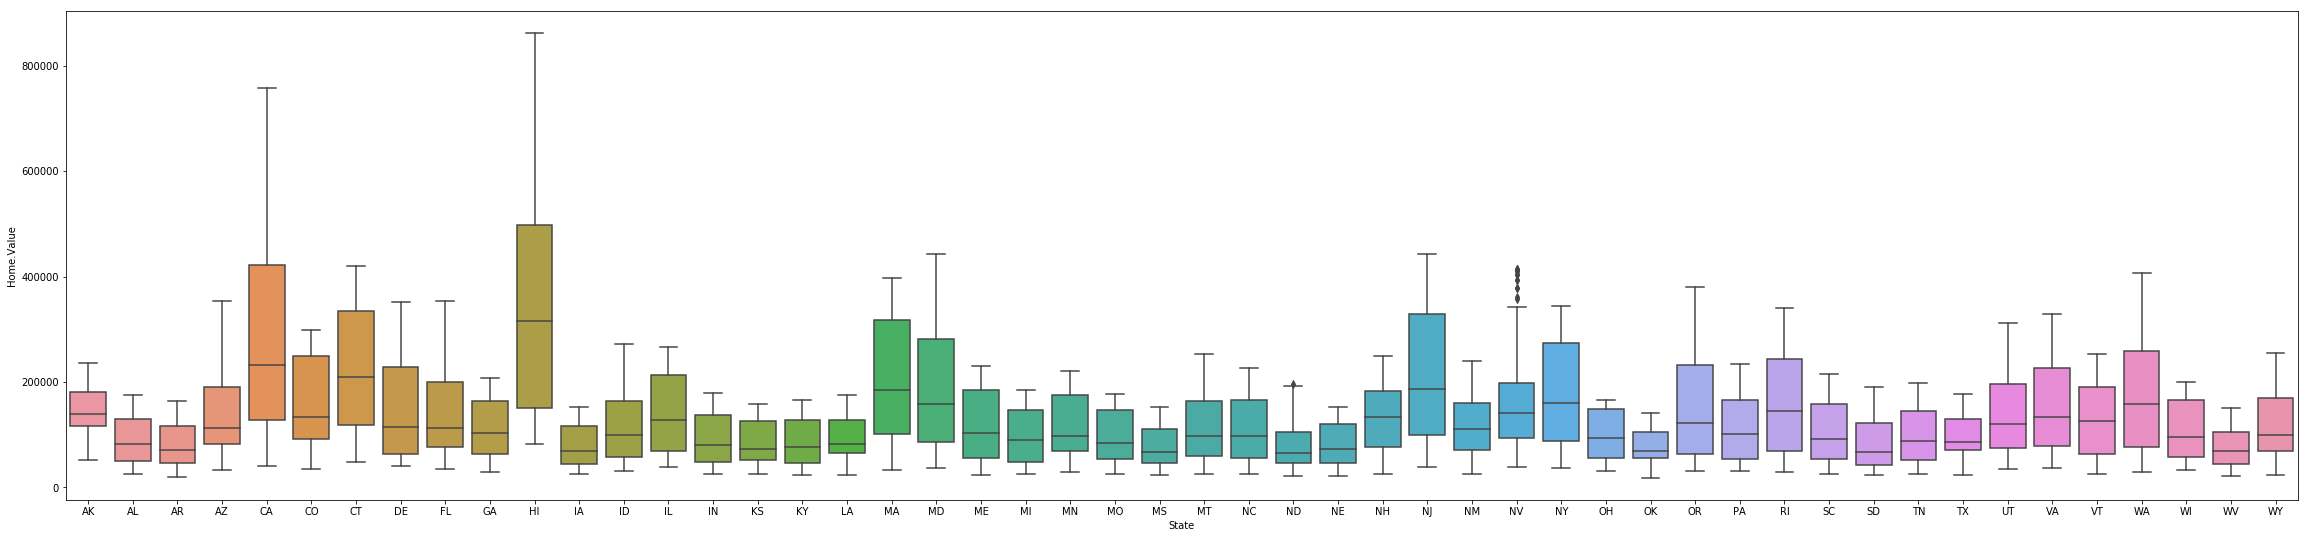

In [13]:
sns.boxplot(x="State", y="Home.Value", data=sred_bak); 3Boxplot of Home value according to State

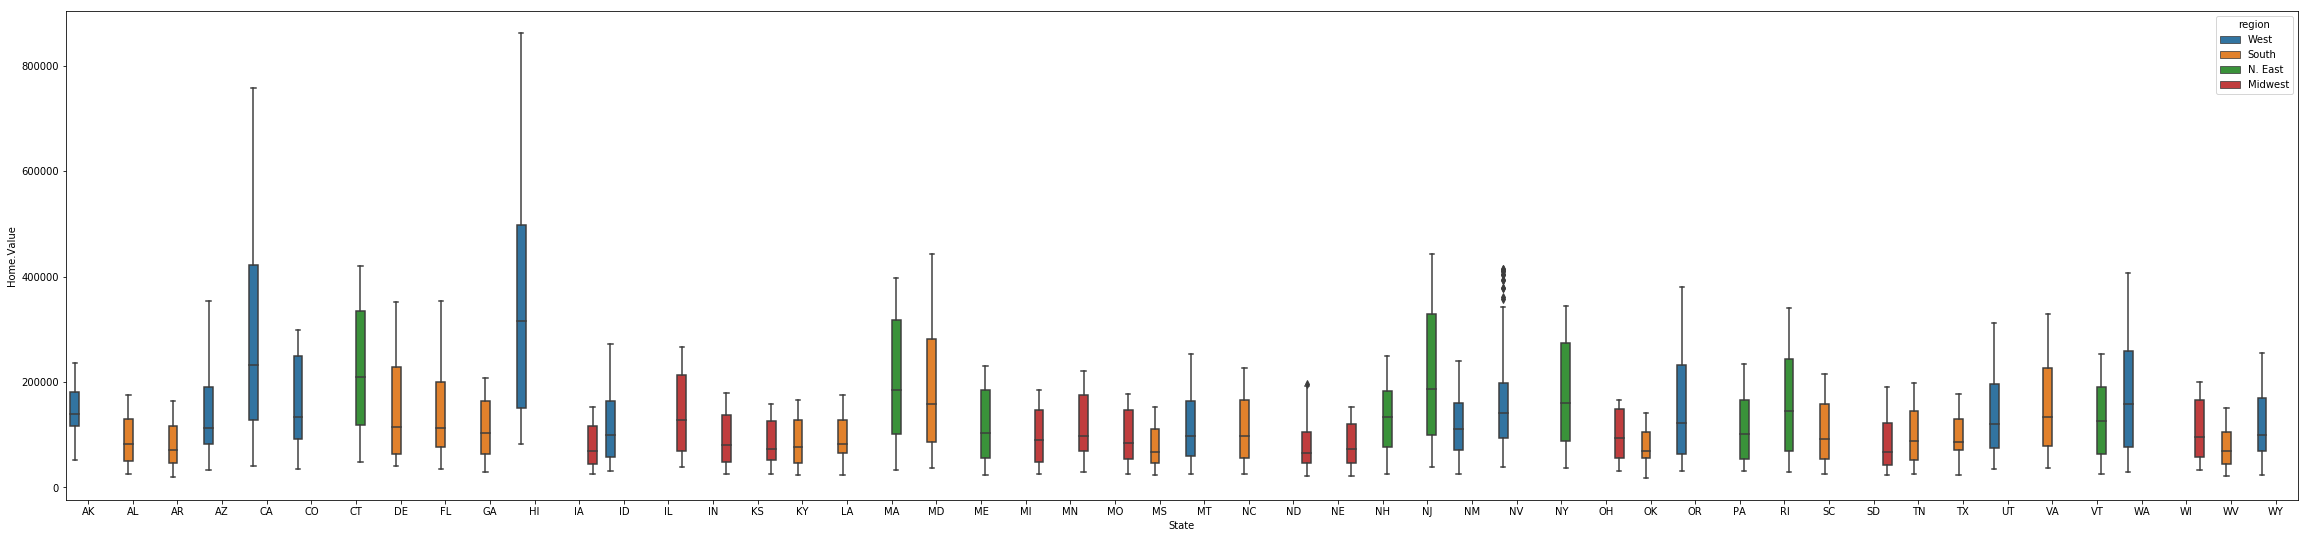

In [15]:
sns.boxplot(x="State", y="Home.Value", hue="region", data=sred_bak); #Boxplot of State and Home value according to region

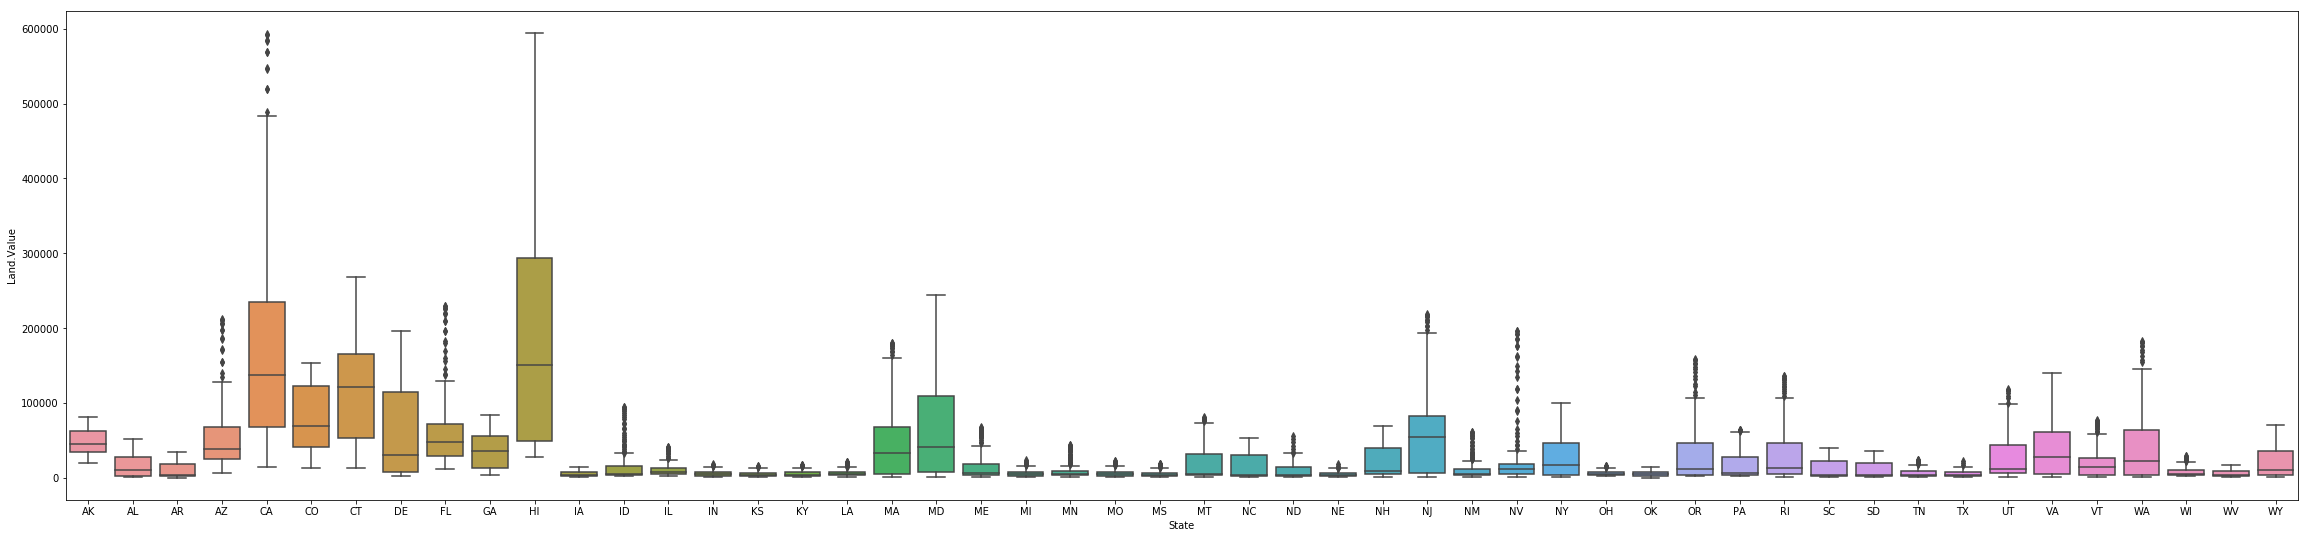

In [16]:
sns.boxplot(x="State", y="Land.Value", data=sred_bak); #Boxplot of State and Land value.

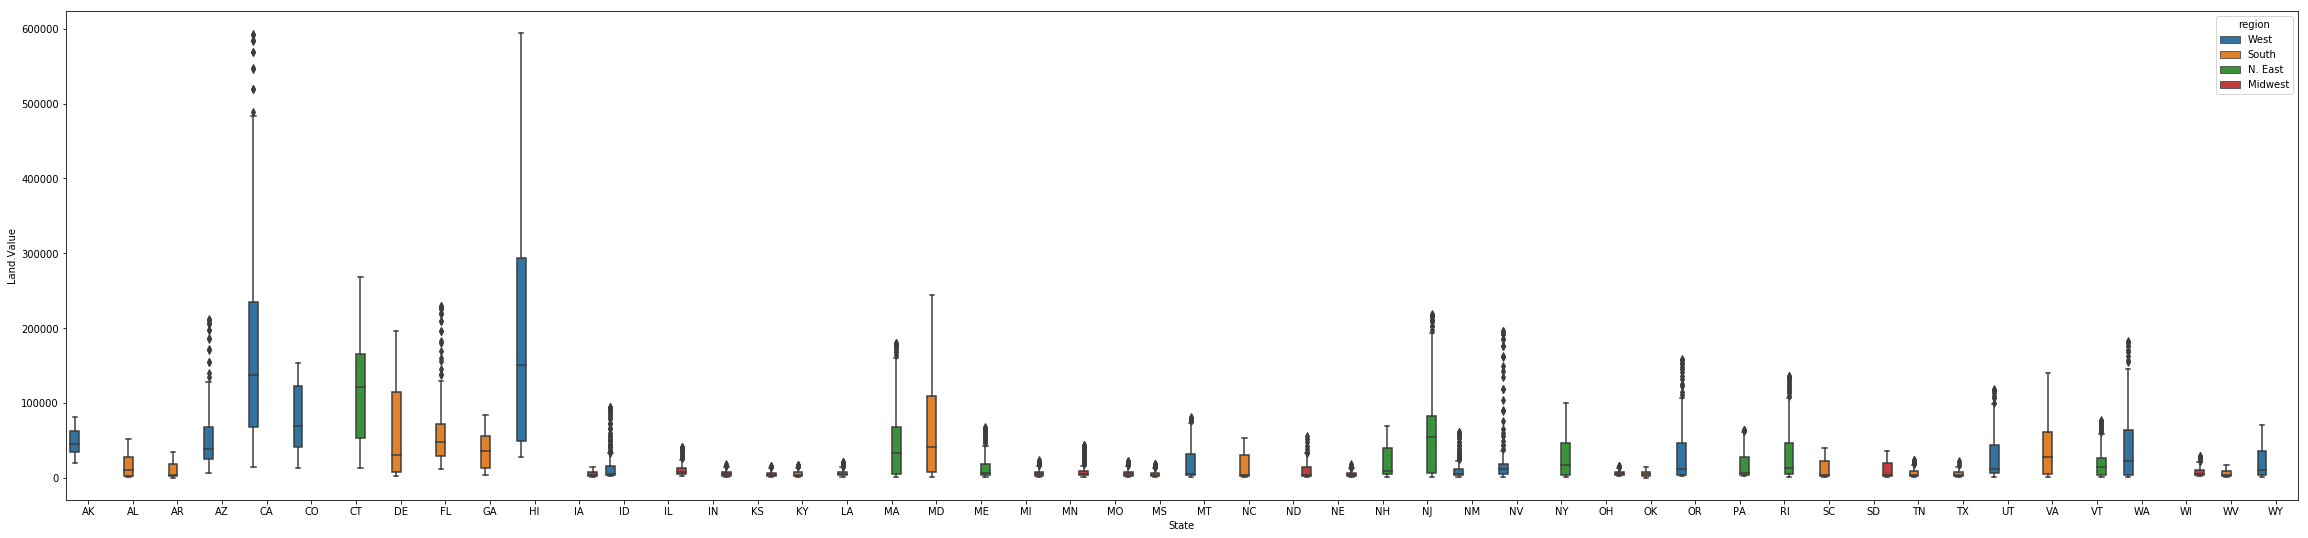

In [17]:
sns.boxplot(x="State", y="Land.Value", hue="region", data=sred_bak); #Boxplot of State and Land value according to the region

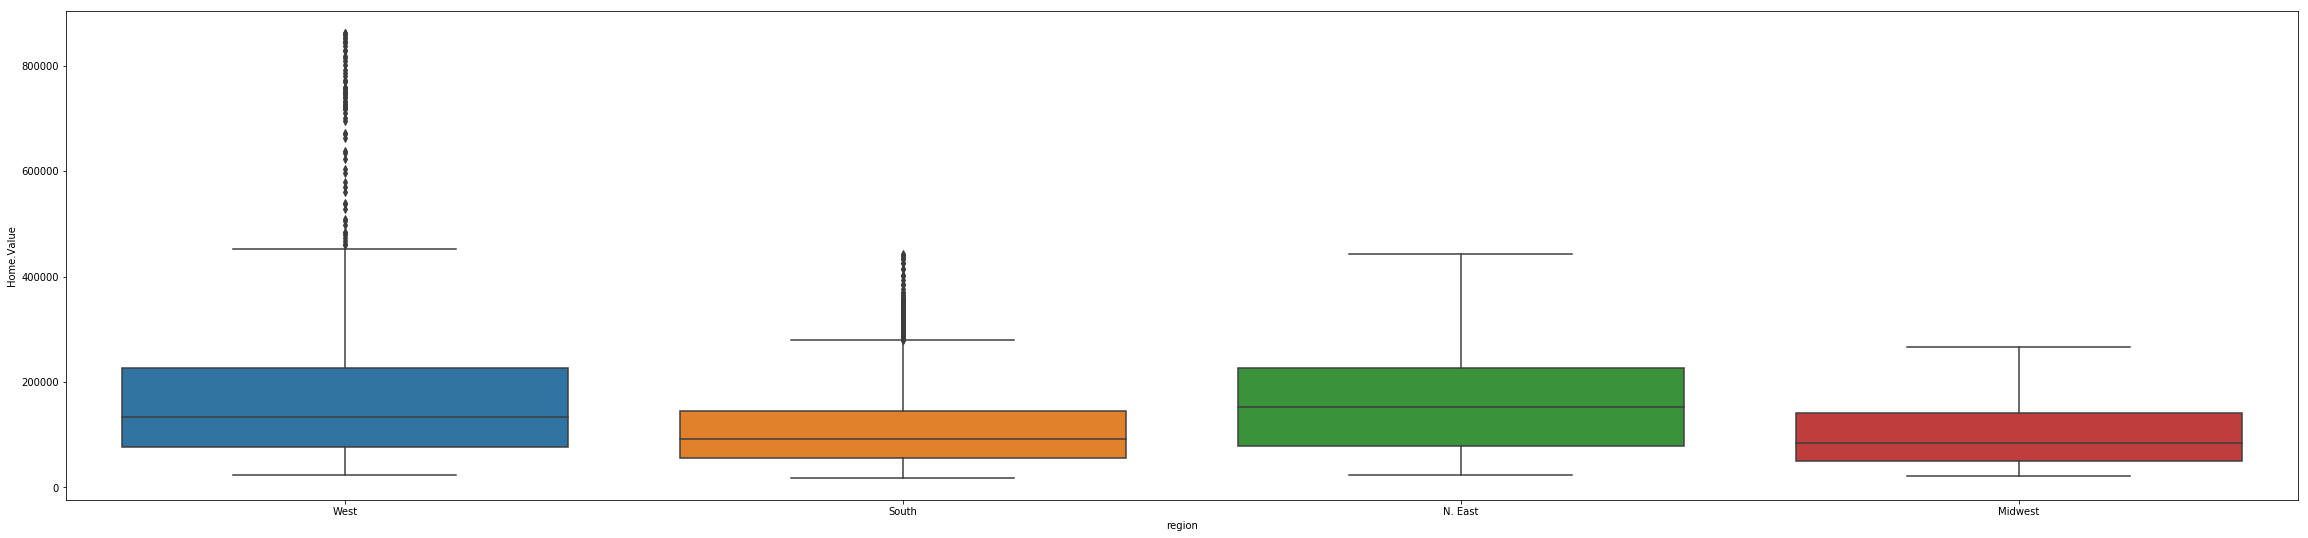

In [18]:
sns.boxplot(x="region", y="Home.Value", data=sred_bak); #Boxplot of region and Home value

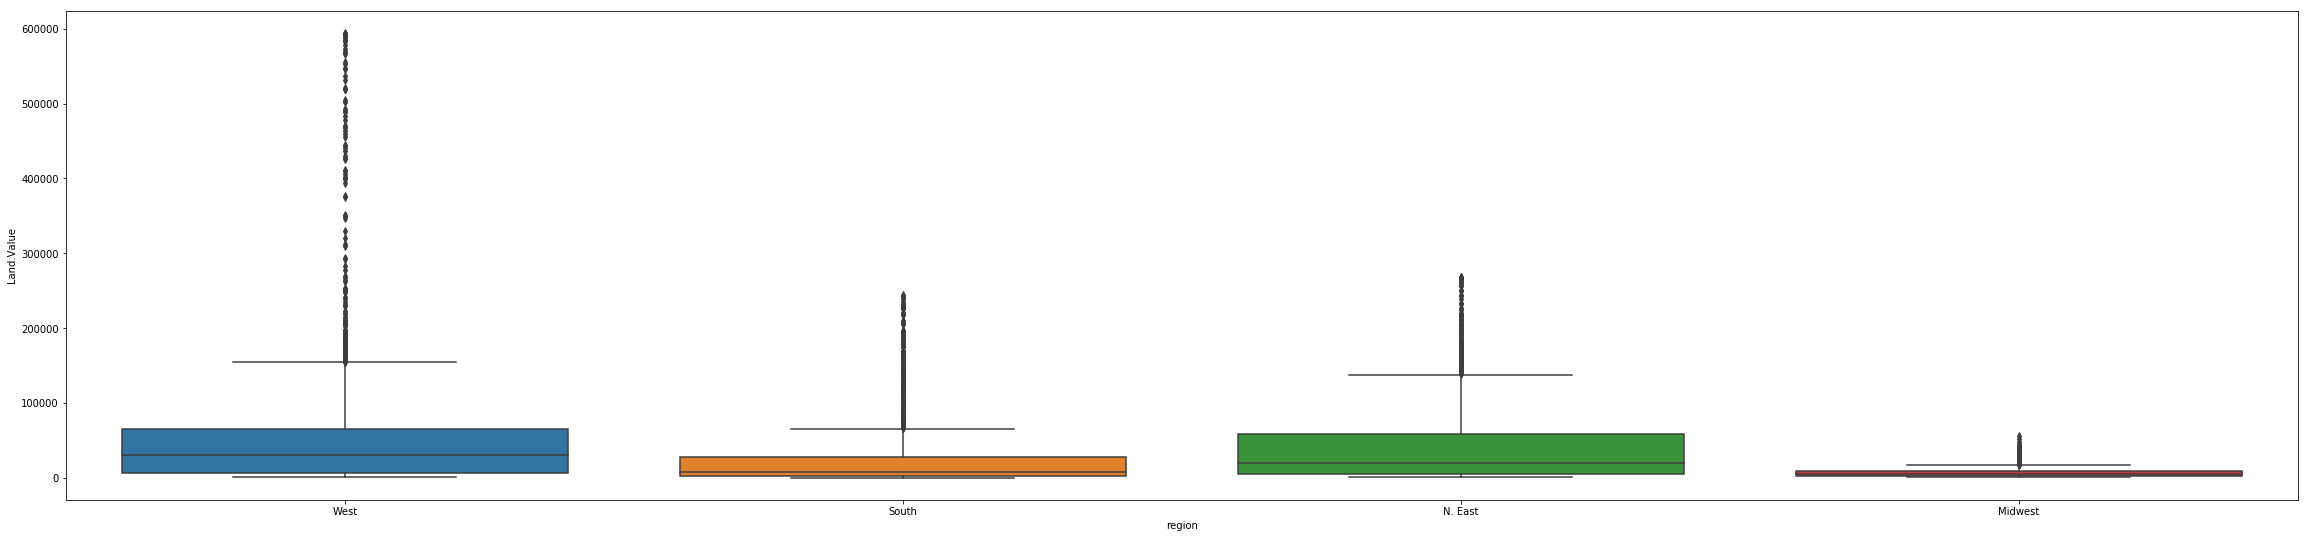

In [19]:
sns.boxplot(x="region", y="Land.Value", data=sred_bak); #Boxplot of region and Land value

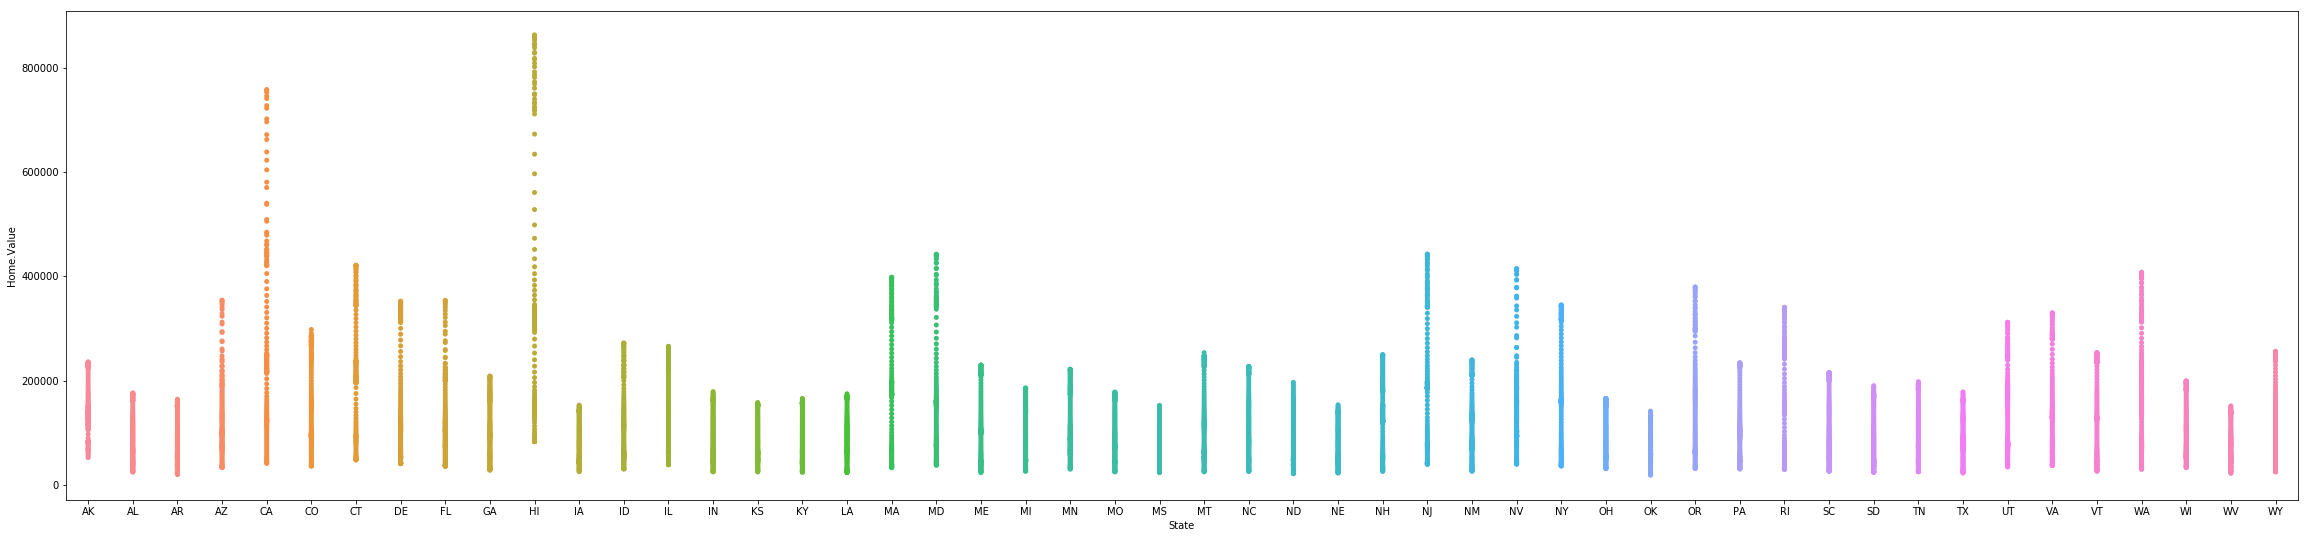

In [20]:
sns.stripplot(x="State", y="Home.Value", data=sred_bak) #Stripplot of State and Home value

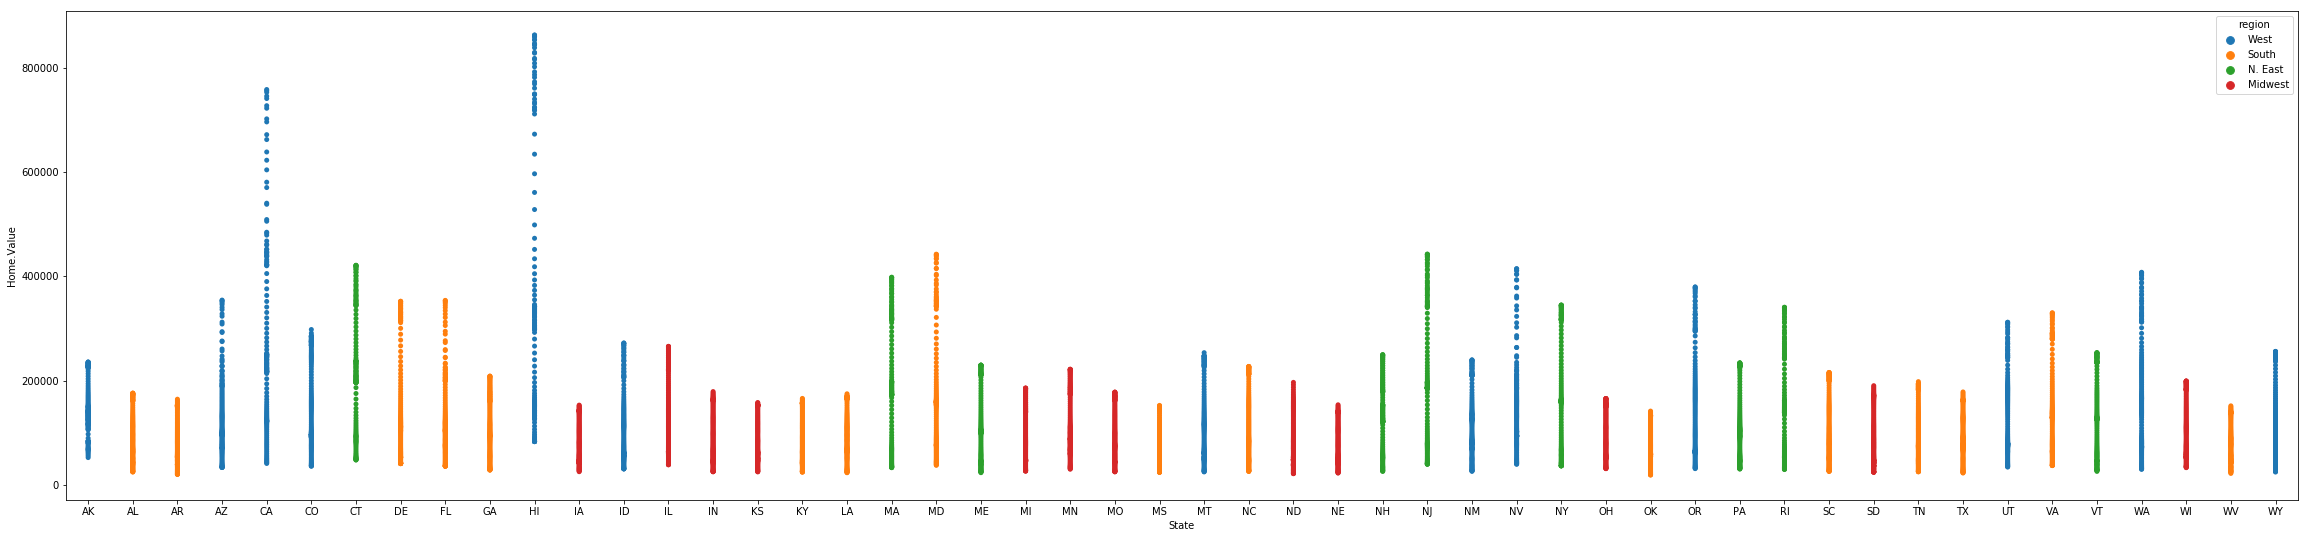

In [21]:
sns.stripplot(x="State", y="Home.Value", hue="region", data=sred_bak) #Stripplot of State and Home value according to region

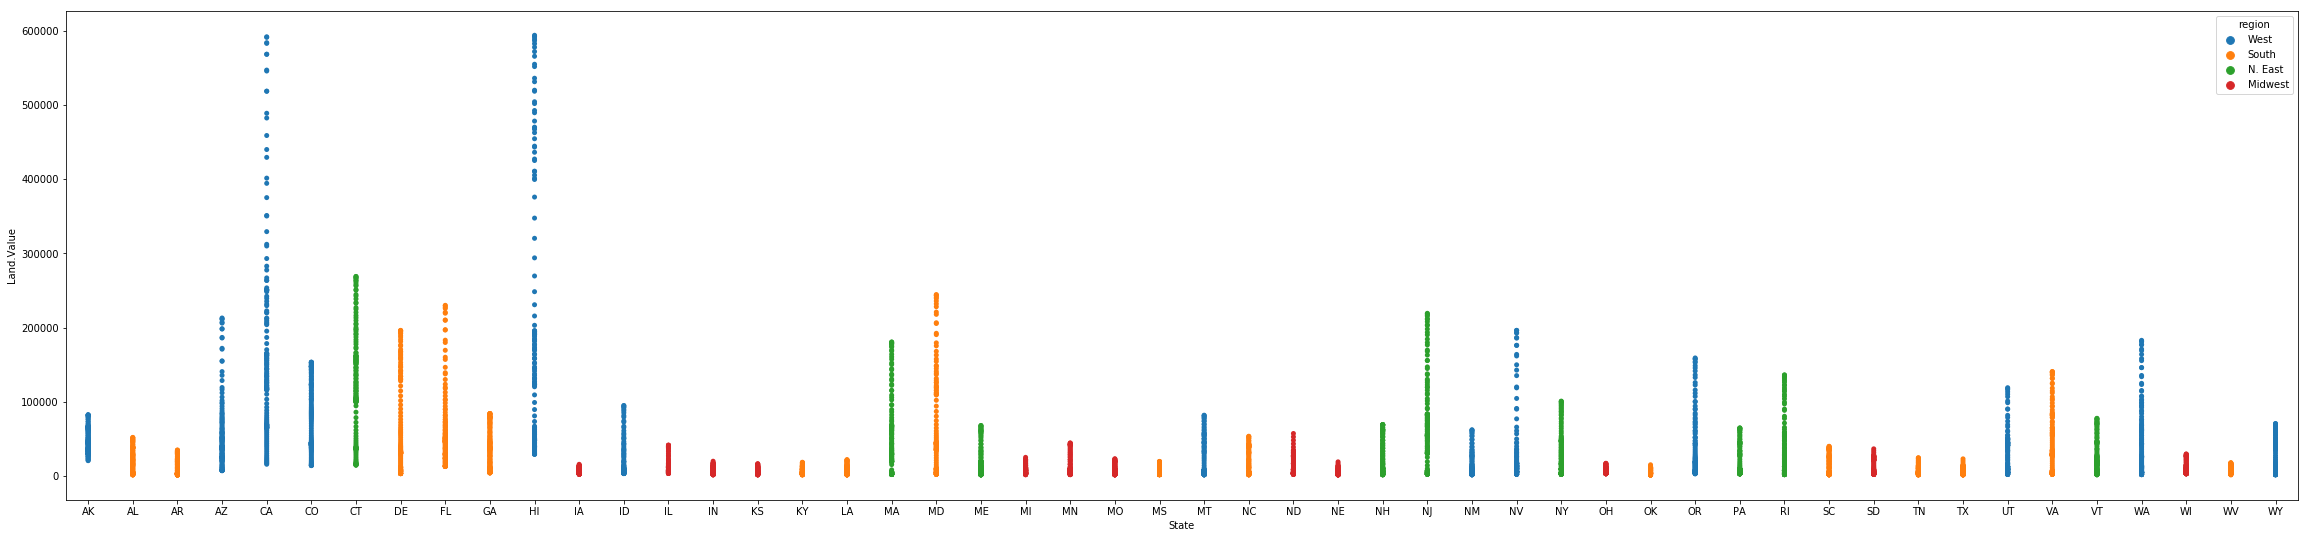

In [22]:
sns.stripplot(x="State", y="Land.Value", hue="region", data=sred_bak) #Stripplot of State and Land value according to the region

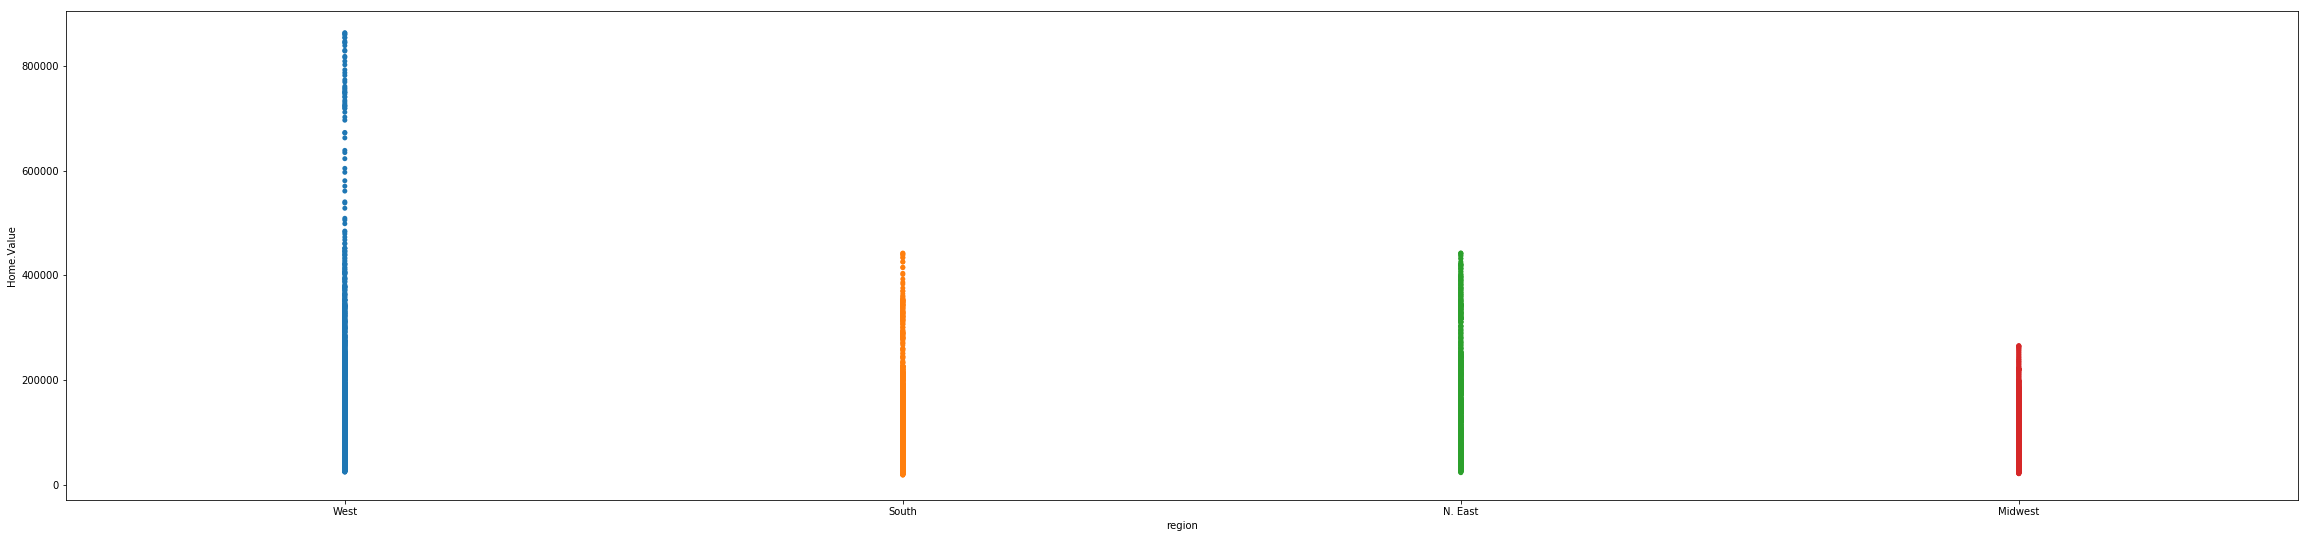

In [23]:
sns.stripplot(x="region", y="Home.Value", data=sred_bak) #Stripplot of region and Home value

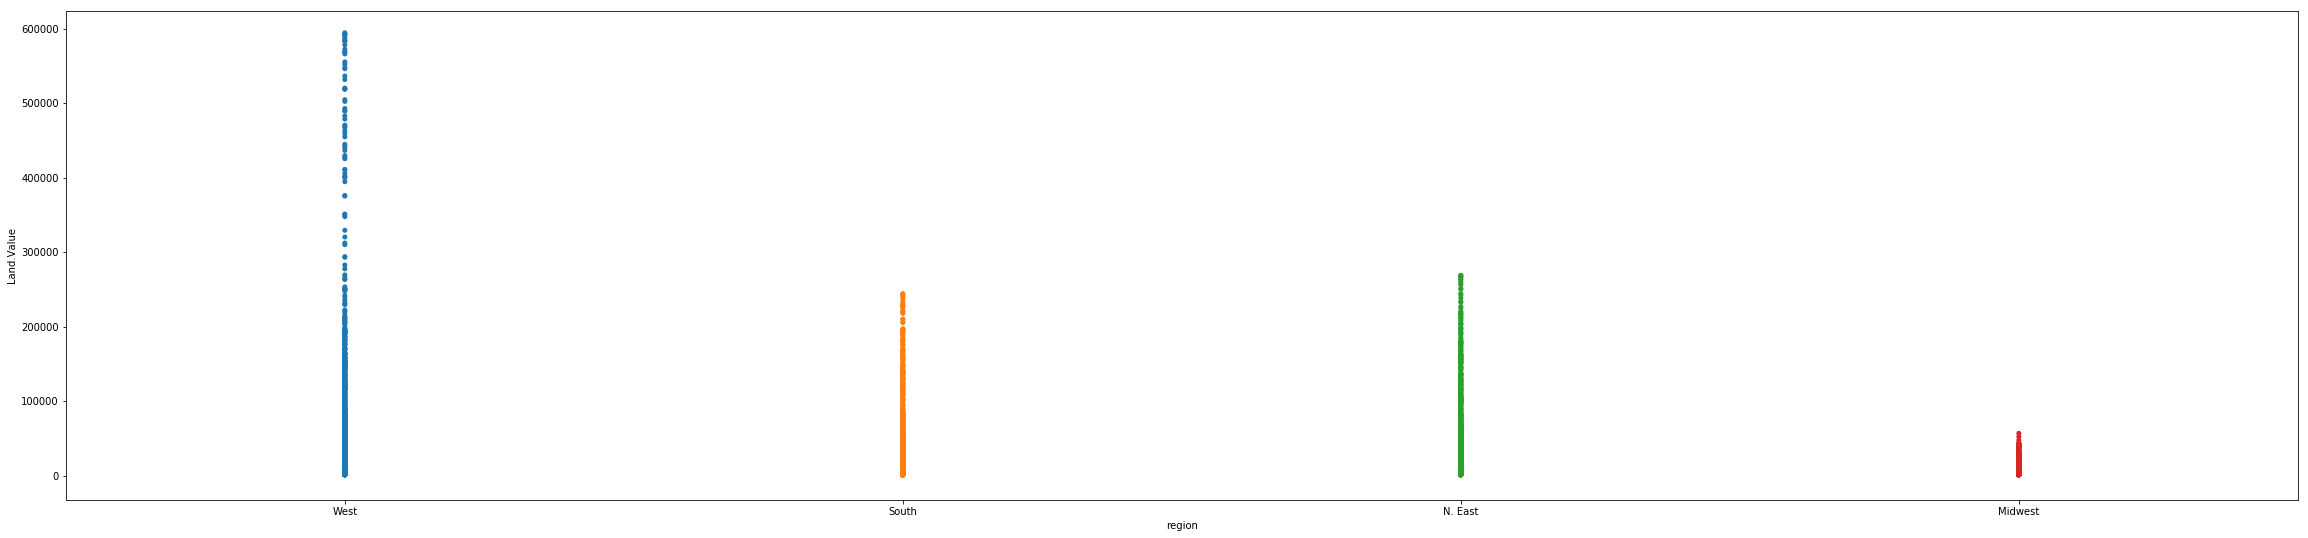

In [24]:
sns.stripplot(x="region", y="Land.Value", data=sred_bak) #Stripplot of Region and Land value

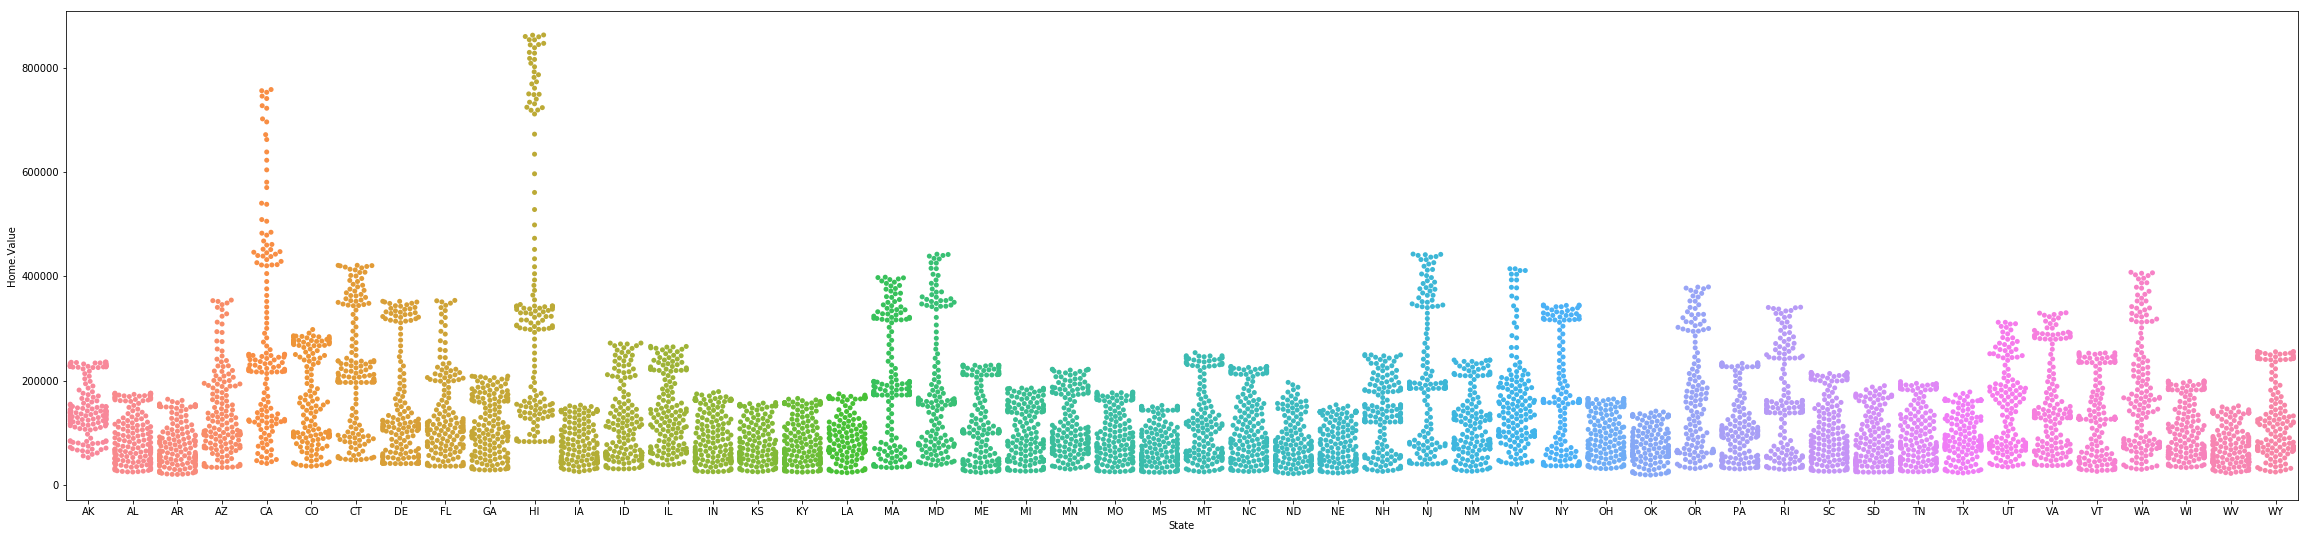

In [25]:
sns.swarmplot(x="State", y="Home.Value", data=sred_bak) #Swarmplot of State and Home value

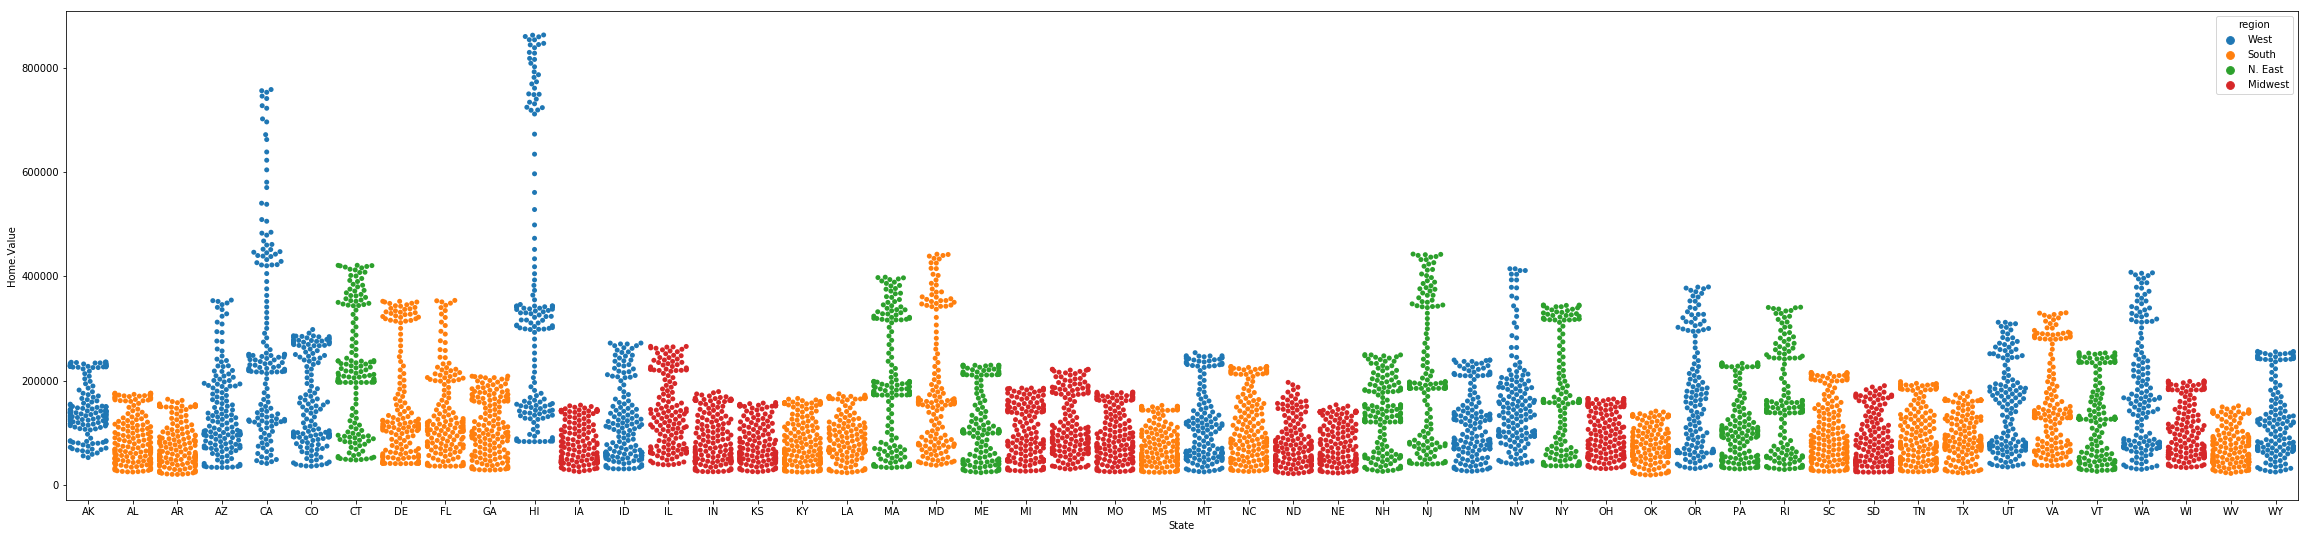

In [27]:
sns.swarmplot(x="State", y="Home.Value", hue="region", data=sred_bak) #Swarmplot of State and Home value

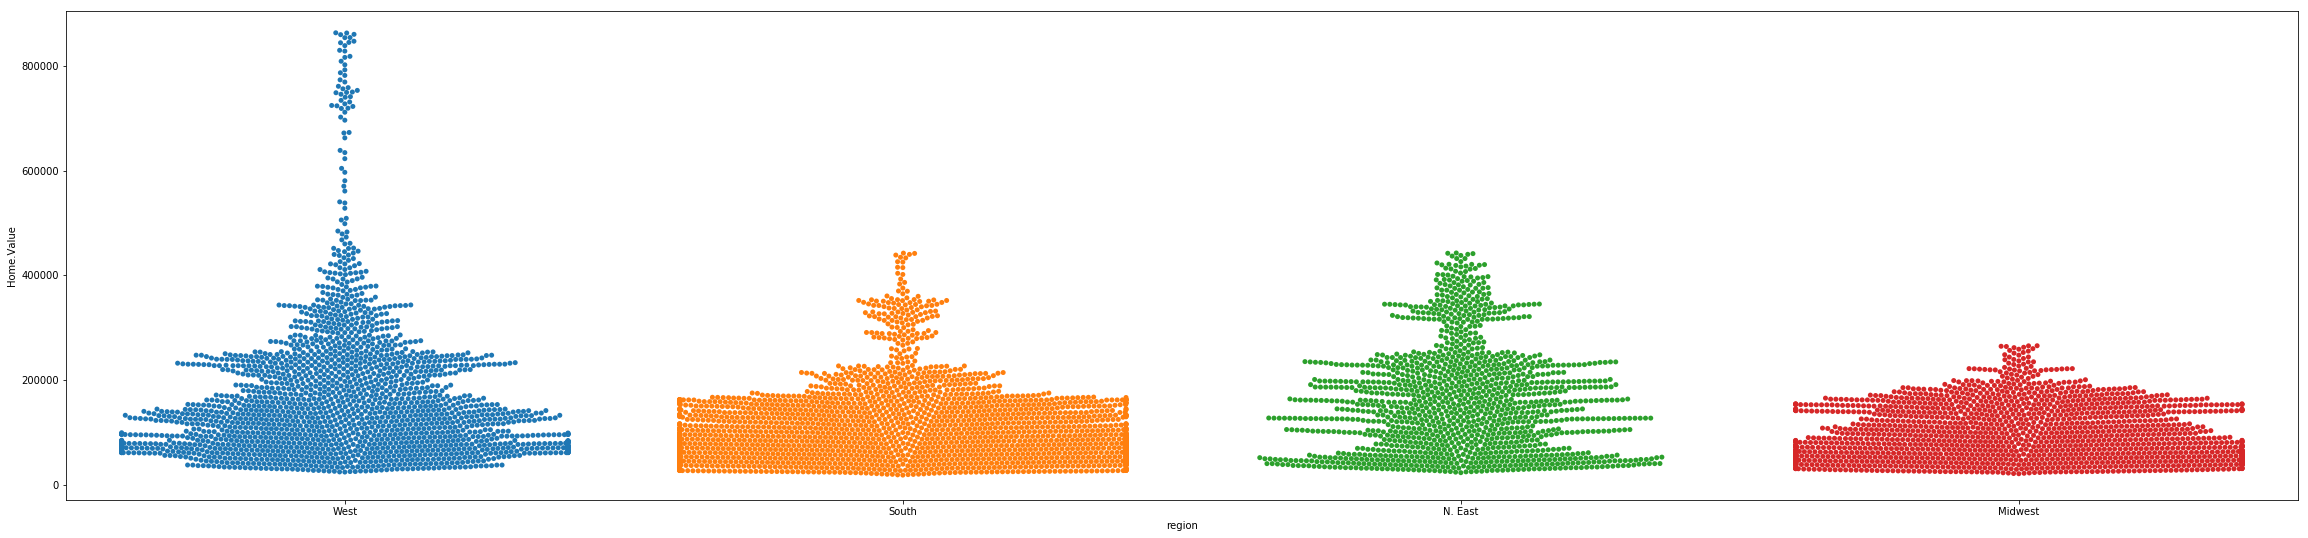

In [29]:
sns.swarmplot(x="region", y="Home.Value", data=sred_bak) #Swarmplot of region and Home value

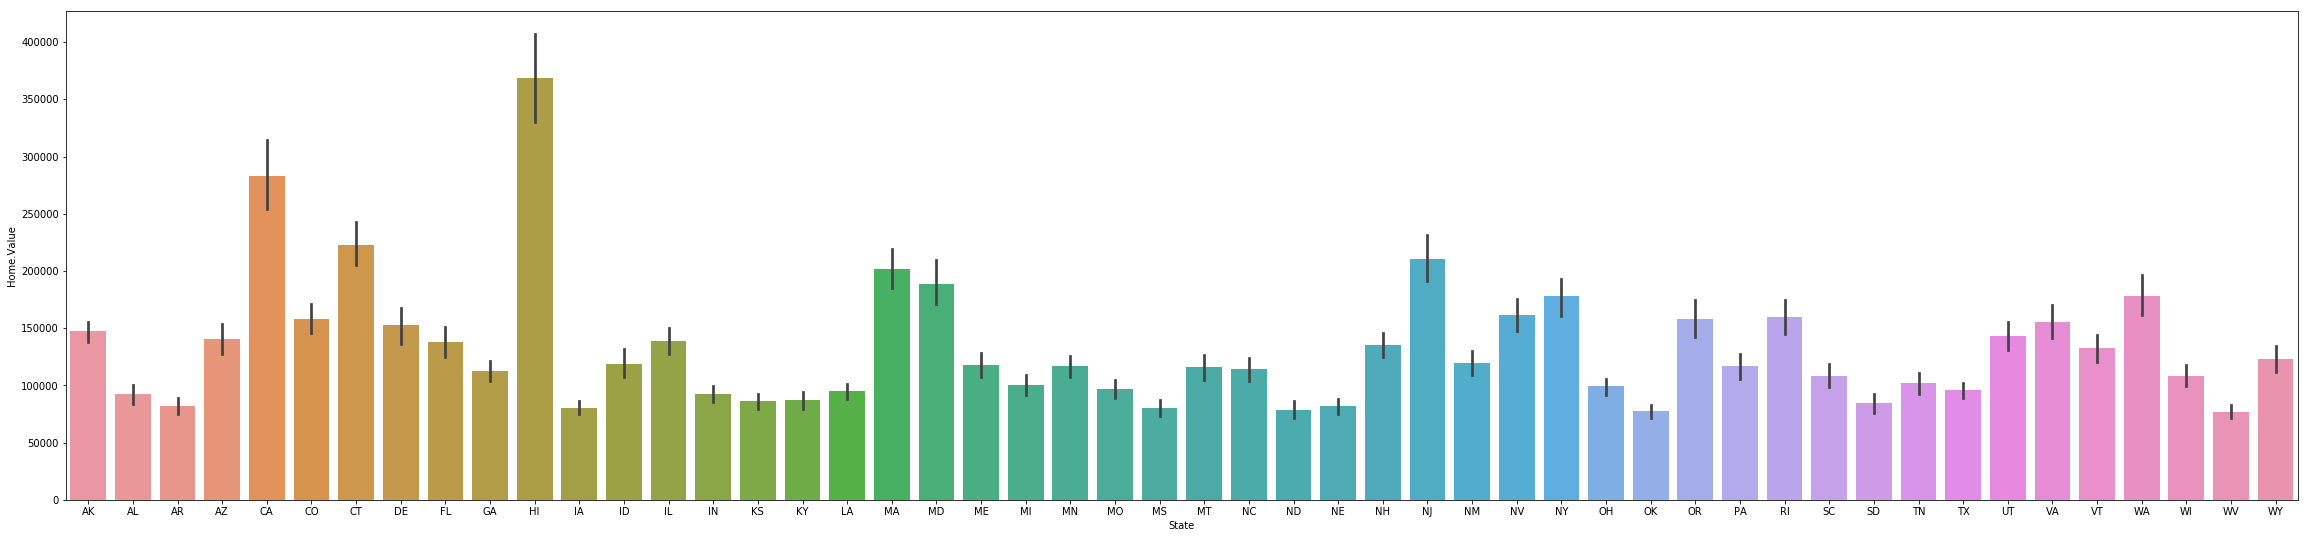

In [33]:
sns.barplot(x="State", y="Home.Value", data=sred_bak) #Barplot of State and Home value

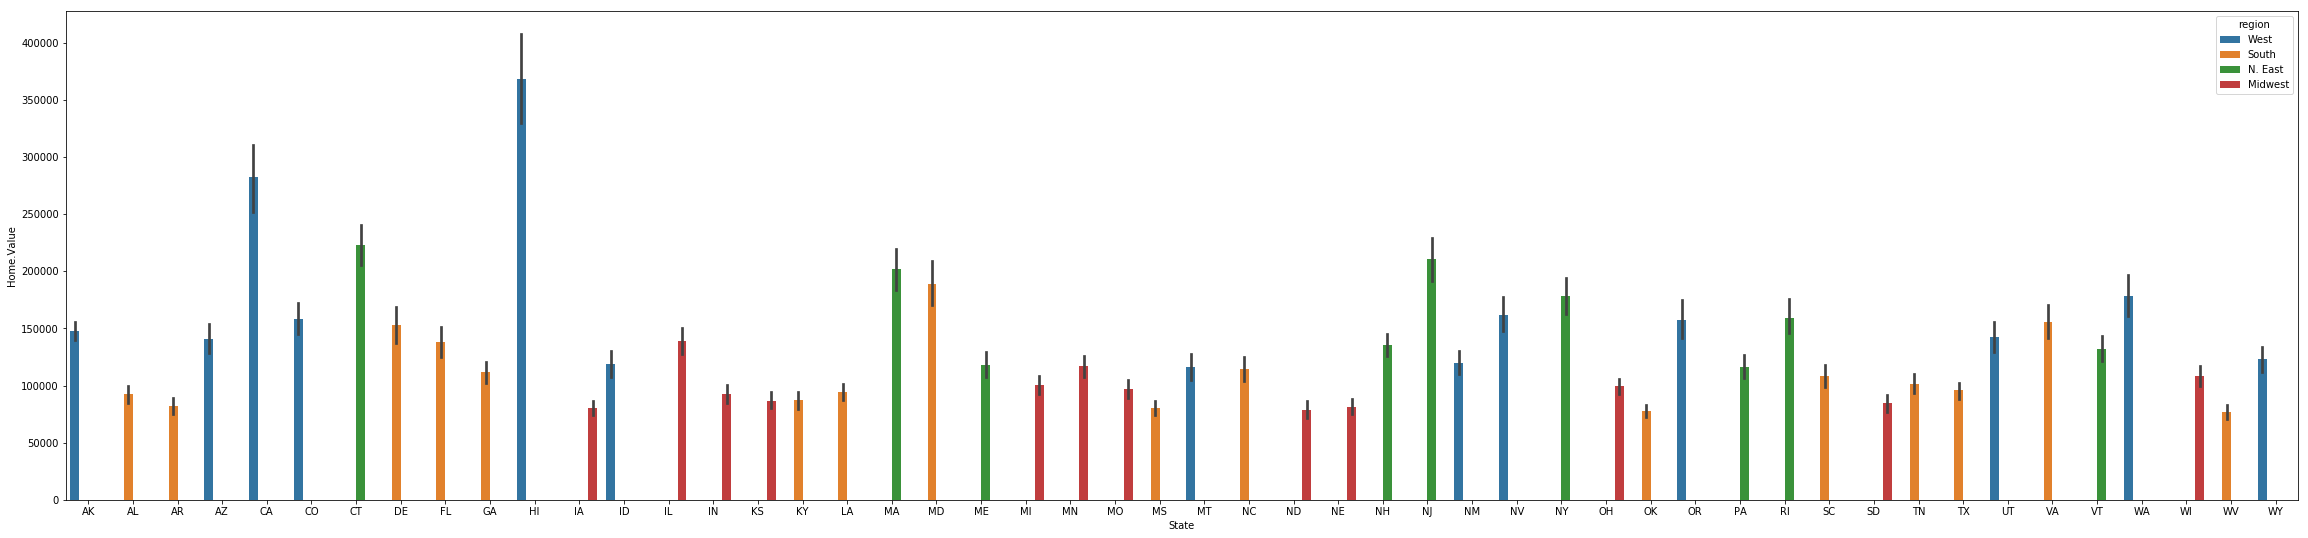

In [34]:
sns.barplot(x="State", y="Home.Value", hue="region", data=sred_bak) #Barplot of State and Home value

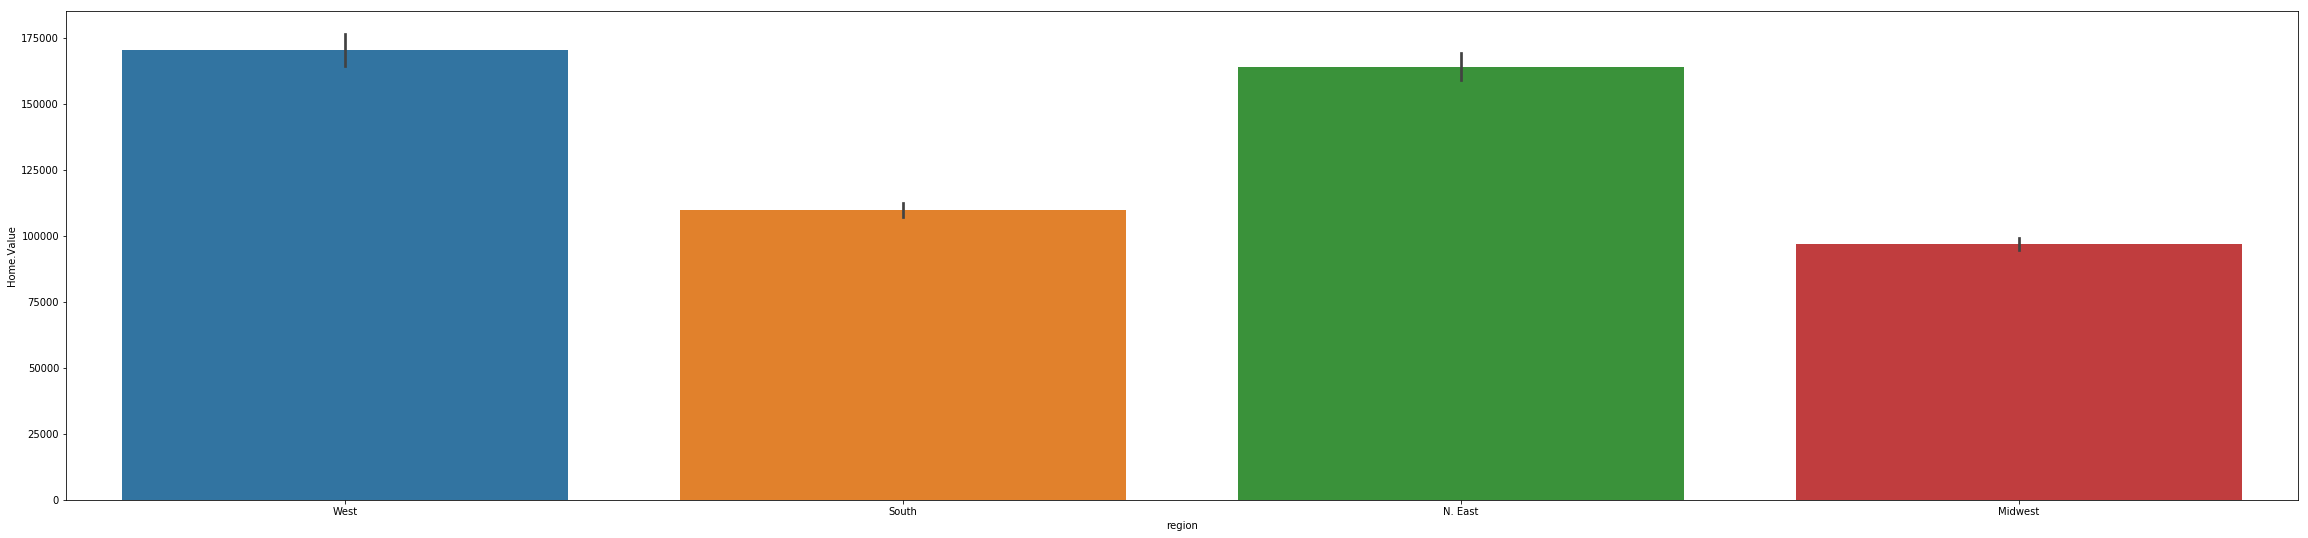

In [30]:
sns.barplot(x="region", y="Home.Value", data=sred_bak) #Barplot of region and Home value

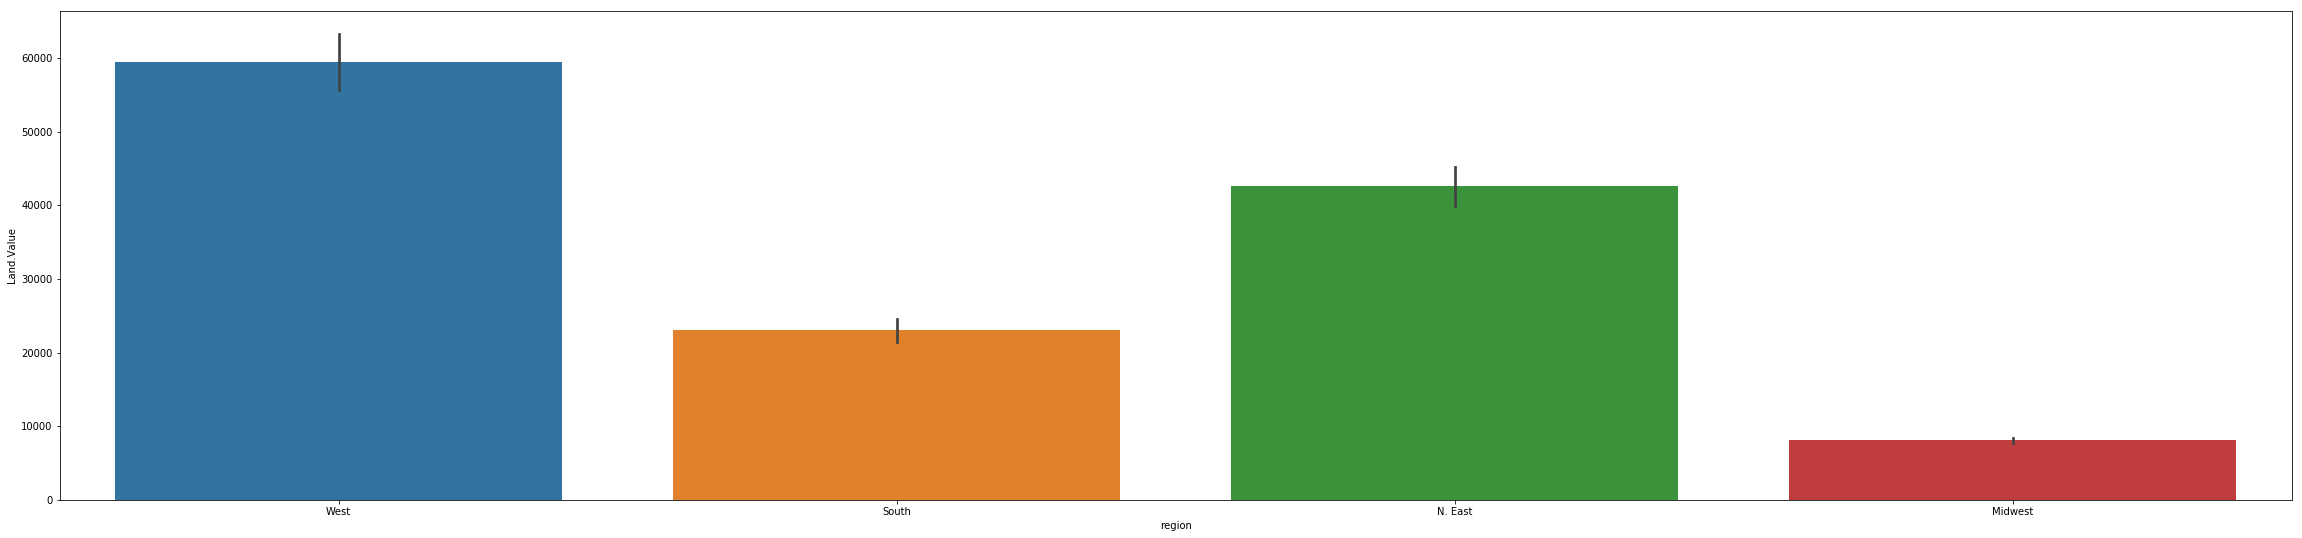

In [31]:
sns.barplot(x="region", y="Land.Value", data=sred_bak) #BArplot of Region and Land value

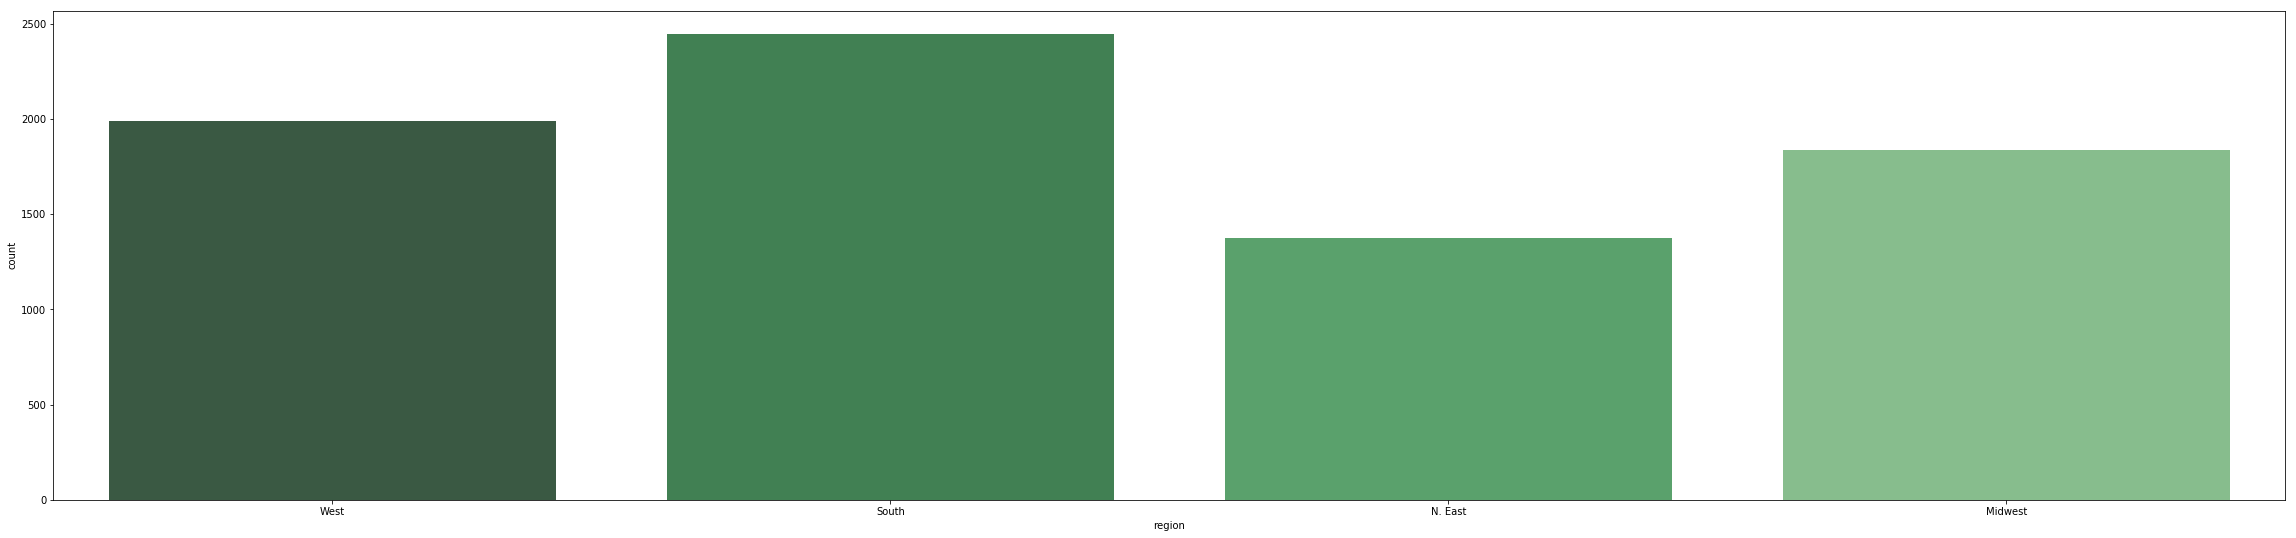

In [35]:
sns.countplot(x="region", data=sred_bak, palette="Greens_d") #Countplot of regions

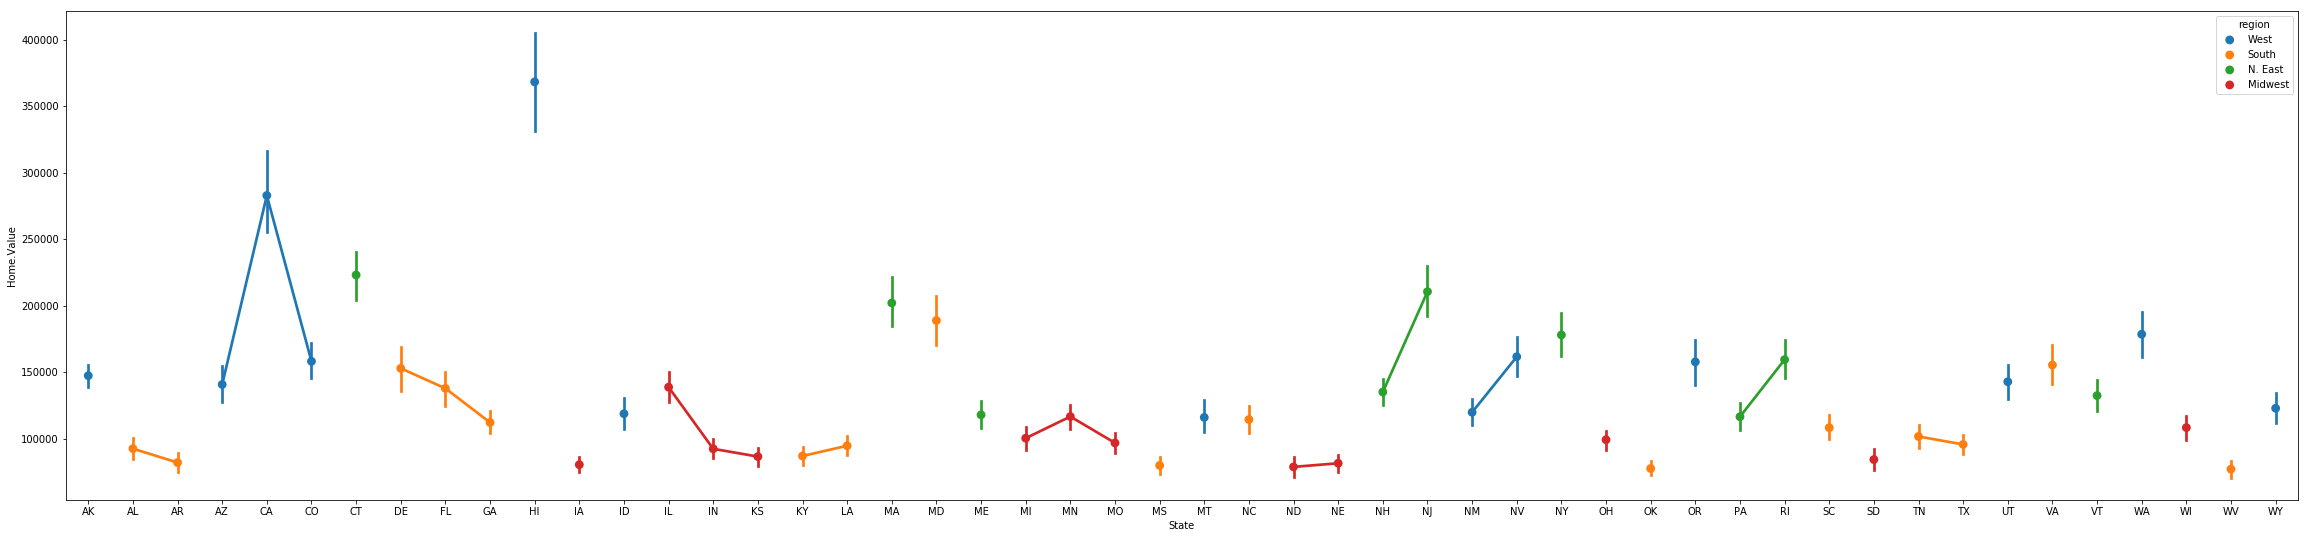

In [37]:
sns.pointplot(x="State", y="Home.Value", hue="region", data=sred_bak) #Pointplot of State and Home value according to Region

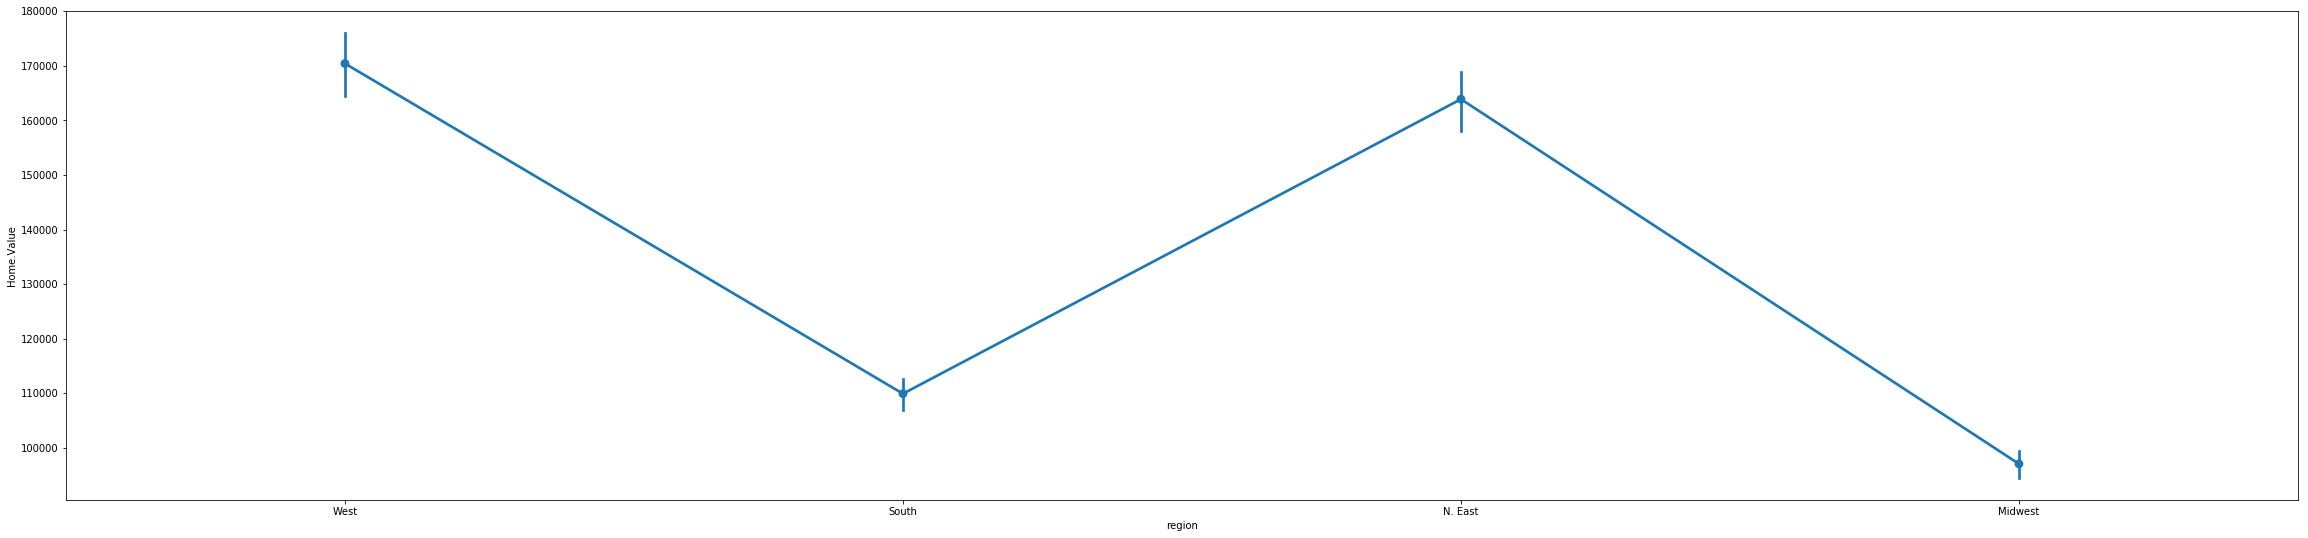

In [39]:
sns.pointplot(x="region", y="Home.Value", data=sred_bak) #Pointplot of Region and Home value

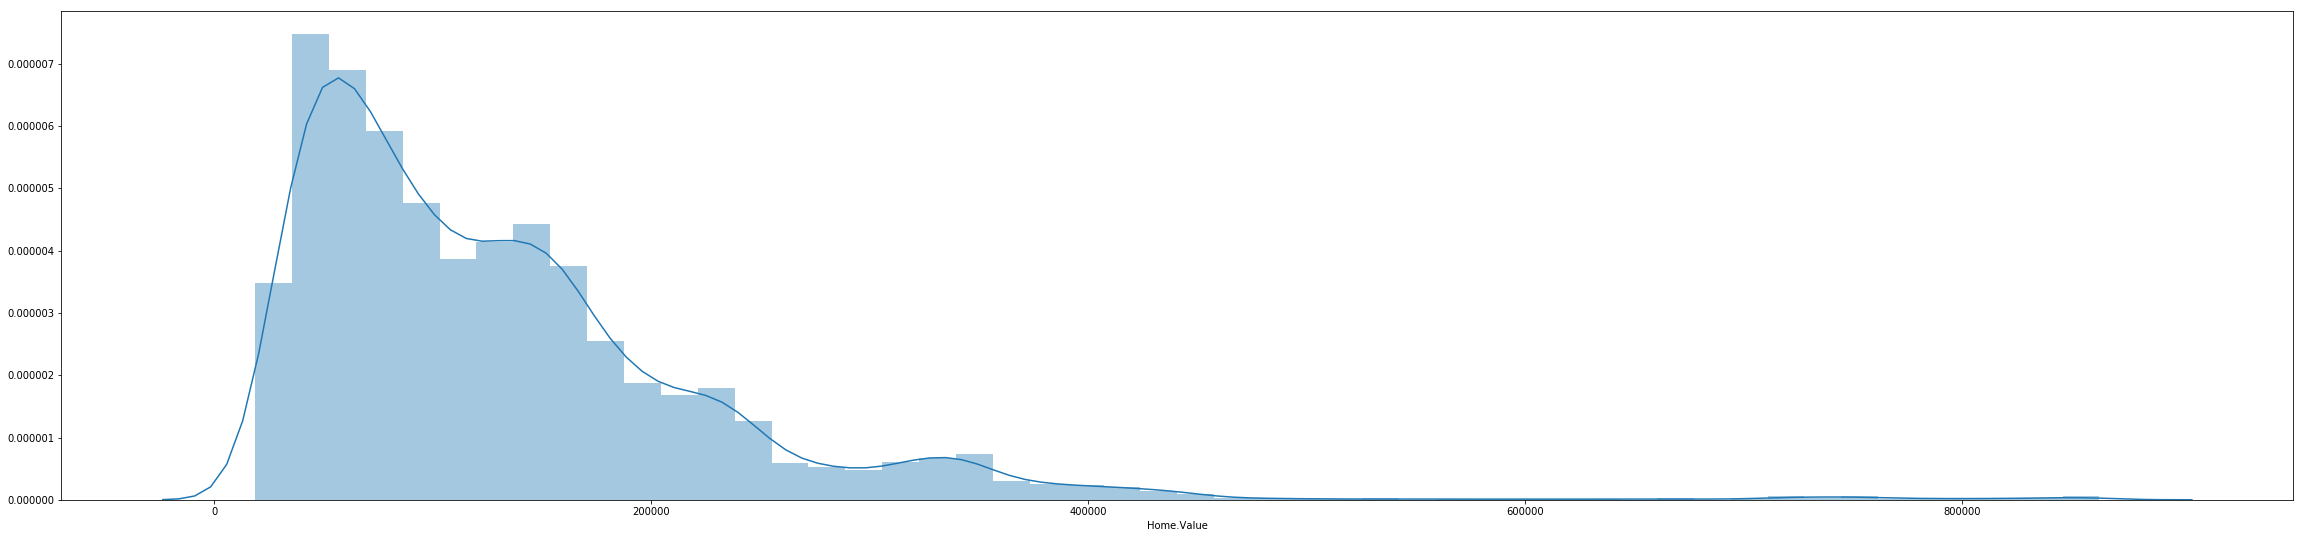

In [40]:
sns.distplot(sred_bak['Home.Value']) #The home value is amximum at around 50000 and starts gradually decreasing around 400000

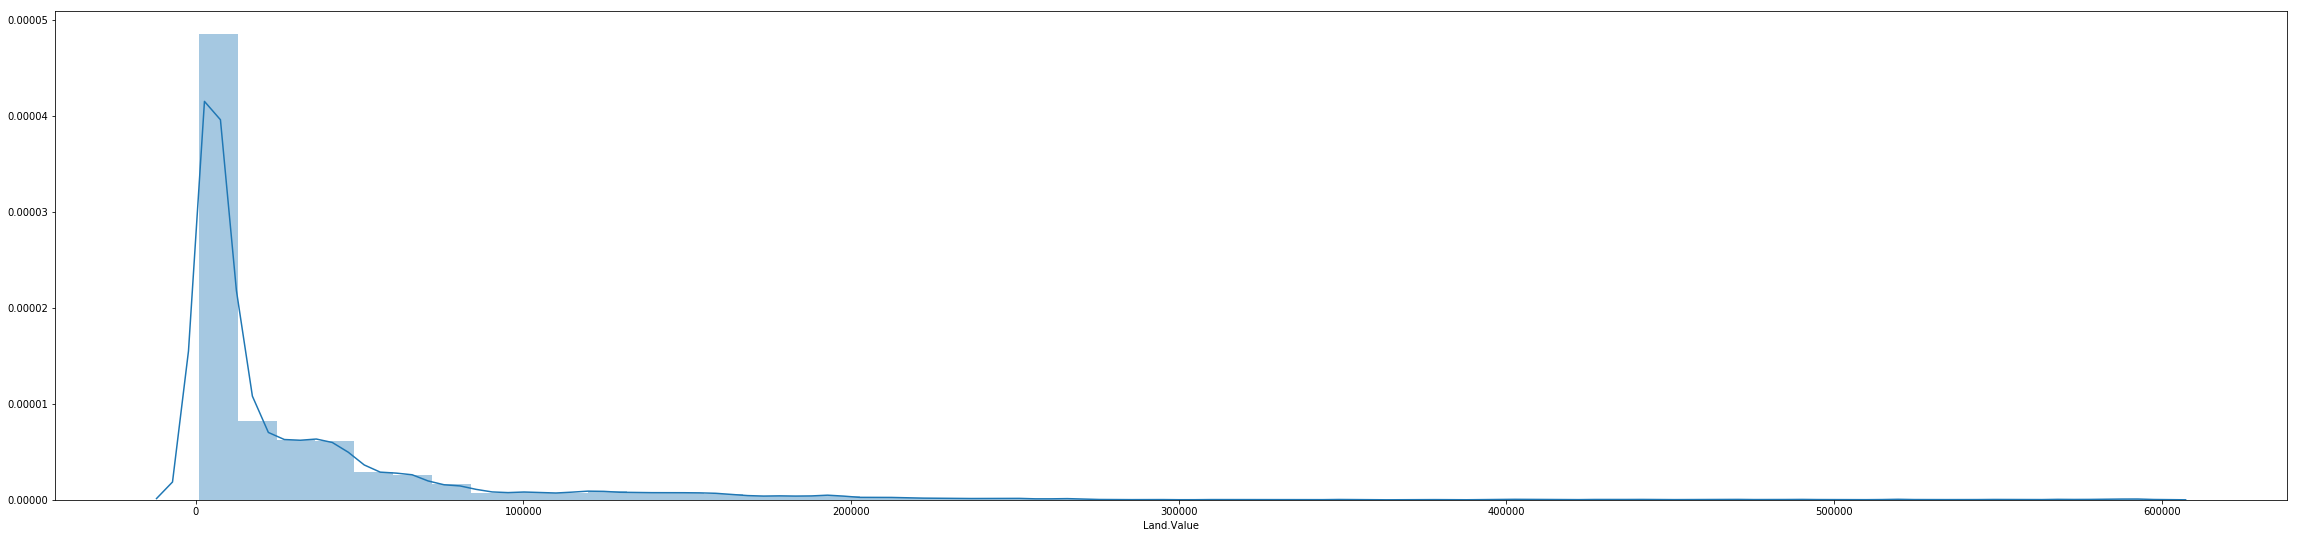

In [41]:
sns.distplot(sred_bak['Land.Value']) #Land value is maximum below 100000 and gradually decreases after 100000

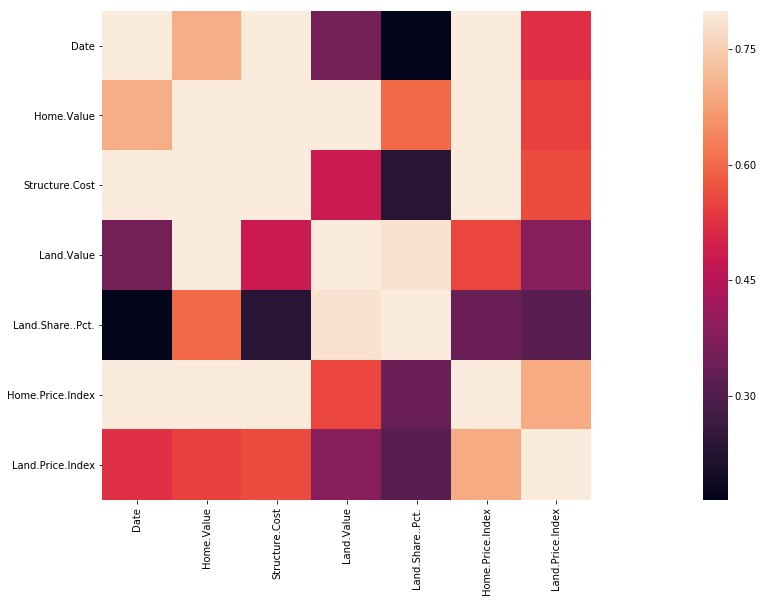

In [43]:
corrmat = sred_bak.corr()
sns.heatmap(corrmat, vmax=.8, square=True) 
#Highest correlation is seen between Home value and Land value.

In [45]:
Home = sred_bak['Home.Value']
Land = sred_bak['Land.Value']
np.corrcoef(Home, Land) #Positive correlation

array([[ 1.        ,  0.86895916],
       [ 0.86895916,  1.        ]])

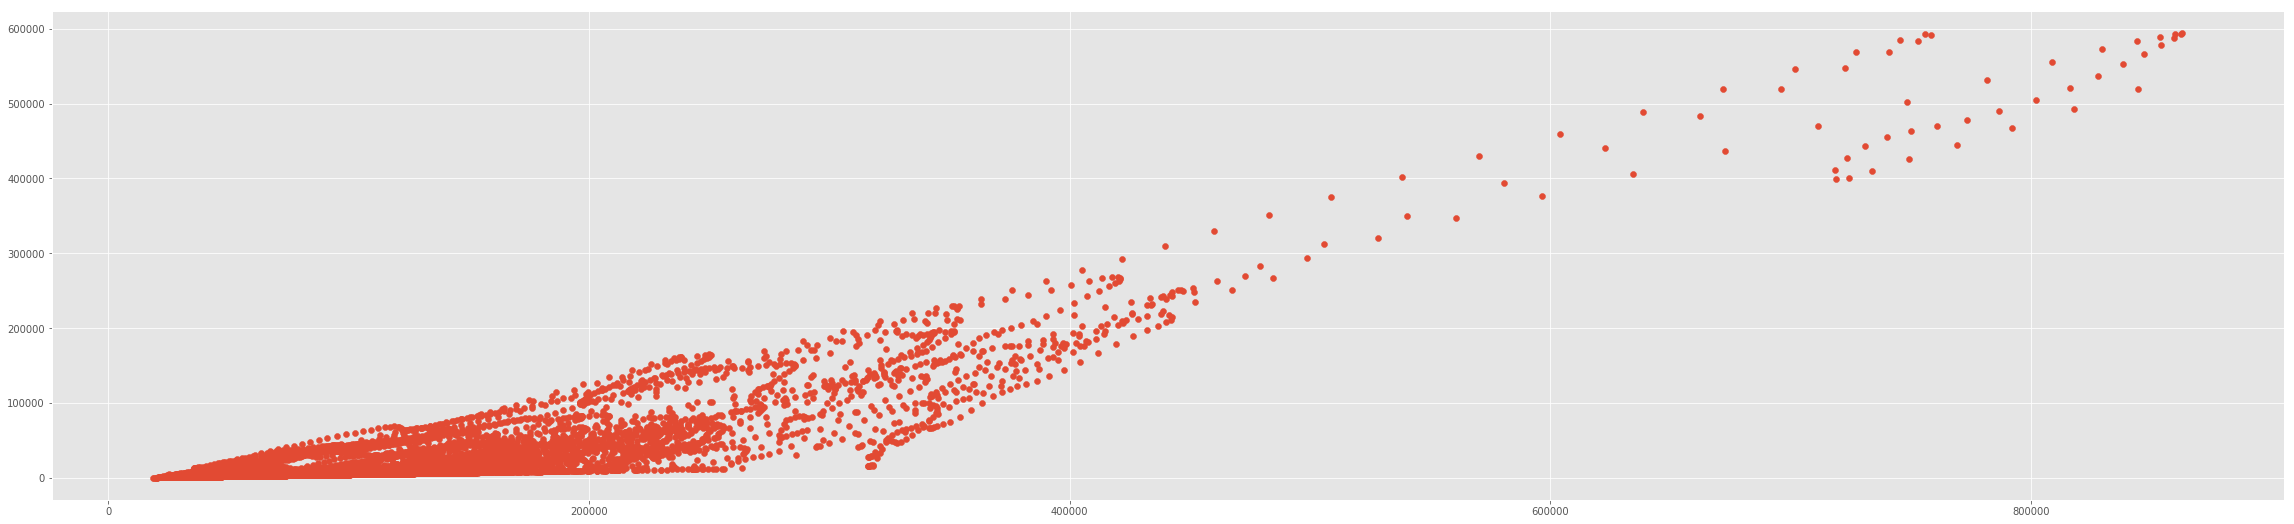

In [47]:
import matplotlib
matplotlib.style.use('ggplot')

plt.scatter(Home, Land)
plt.show() #Scatterplot of Home value and Land value